Found 61 catalog files

z=0.06: 12 triple AGN systems
z=0.08: 28 triple AGN systems
z=0.10: 26 triple AGN systems
z=0.12: 15 triple AGN systems
z=0.13: 6 triple AGN systems
z=0.16: 20 triple AGN systems
z=0.17: 11 triple AGN systems
z=0.21: 17 triple AGN systems
z=0.25: 20 triple AGN systems
z=0.26: 43 triple AGN systems
z=0.29: 12 triple AGN systems
z=0.31: 13 triple AGN systems
z=0.34: 23 triple AGN systems
z=0.36: 29 triple AGN systems
z=0.39: 10 triple AGN systems
z=0.41: 17 triple AGN systems
z=0.44: 11 triple AGN systems
z=0.46: 14 triple AGN systems
z=0.50: 13 triple AGN systems
z=0.52: 26 triple AGN systems
z=0.56: 34 triple AGN systems
z=0.58: 23 triple AGN systems
z=0.62: 23 triple AGN systems
z=0.64: 10 triple AGN systems
z=0.70: 54 triple AGN systems
z=0.75: 23 triple AGN systems
z=0.77: 31 triple AGN systems
z=0.84: 33 triple AGN systems
z=0.86: 27 triple AGN systems
z=0.91: 56 triple AGN systems
z=0.98: 24 triple AGN systems
z=1.00: 31 triple AGN systems
z=1.06: 58 triple

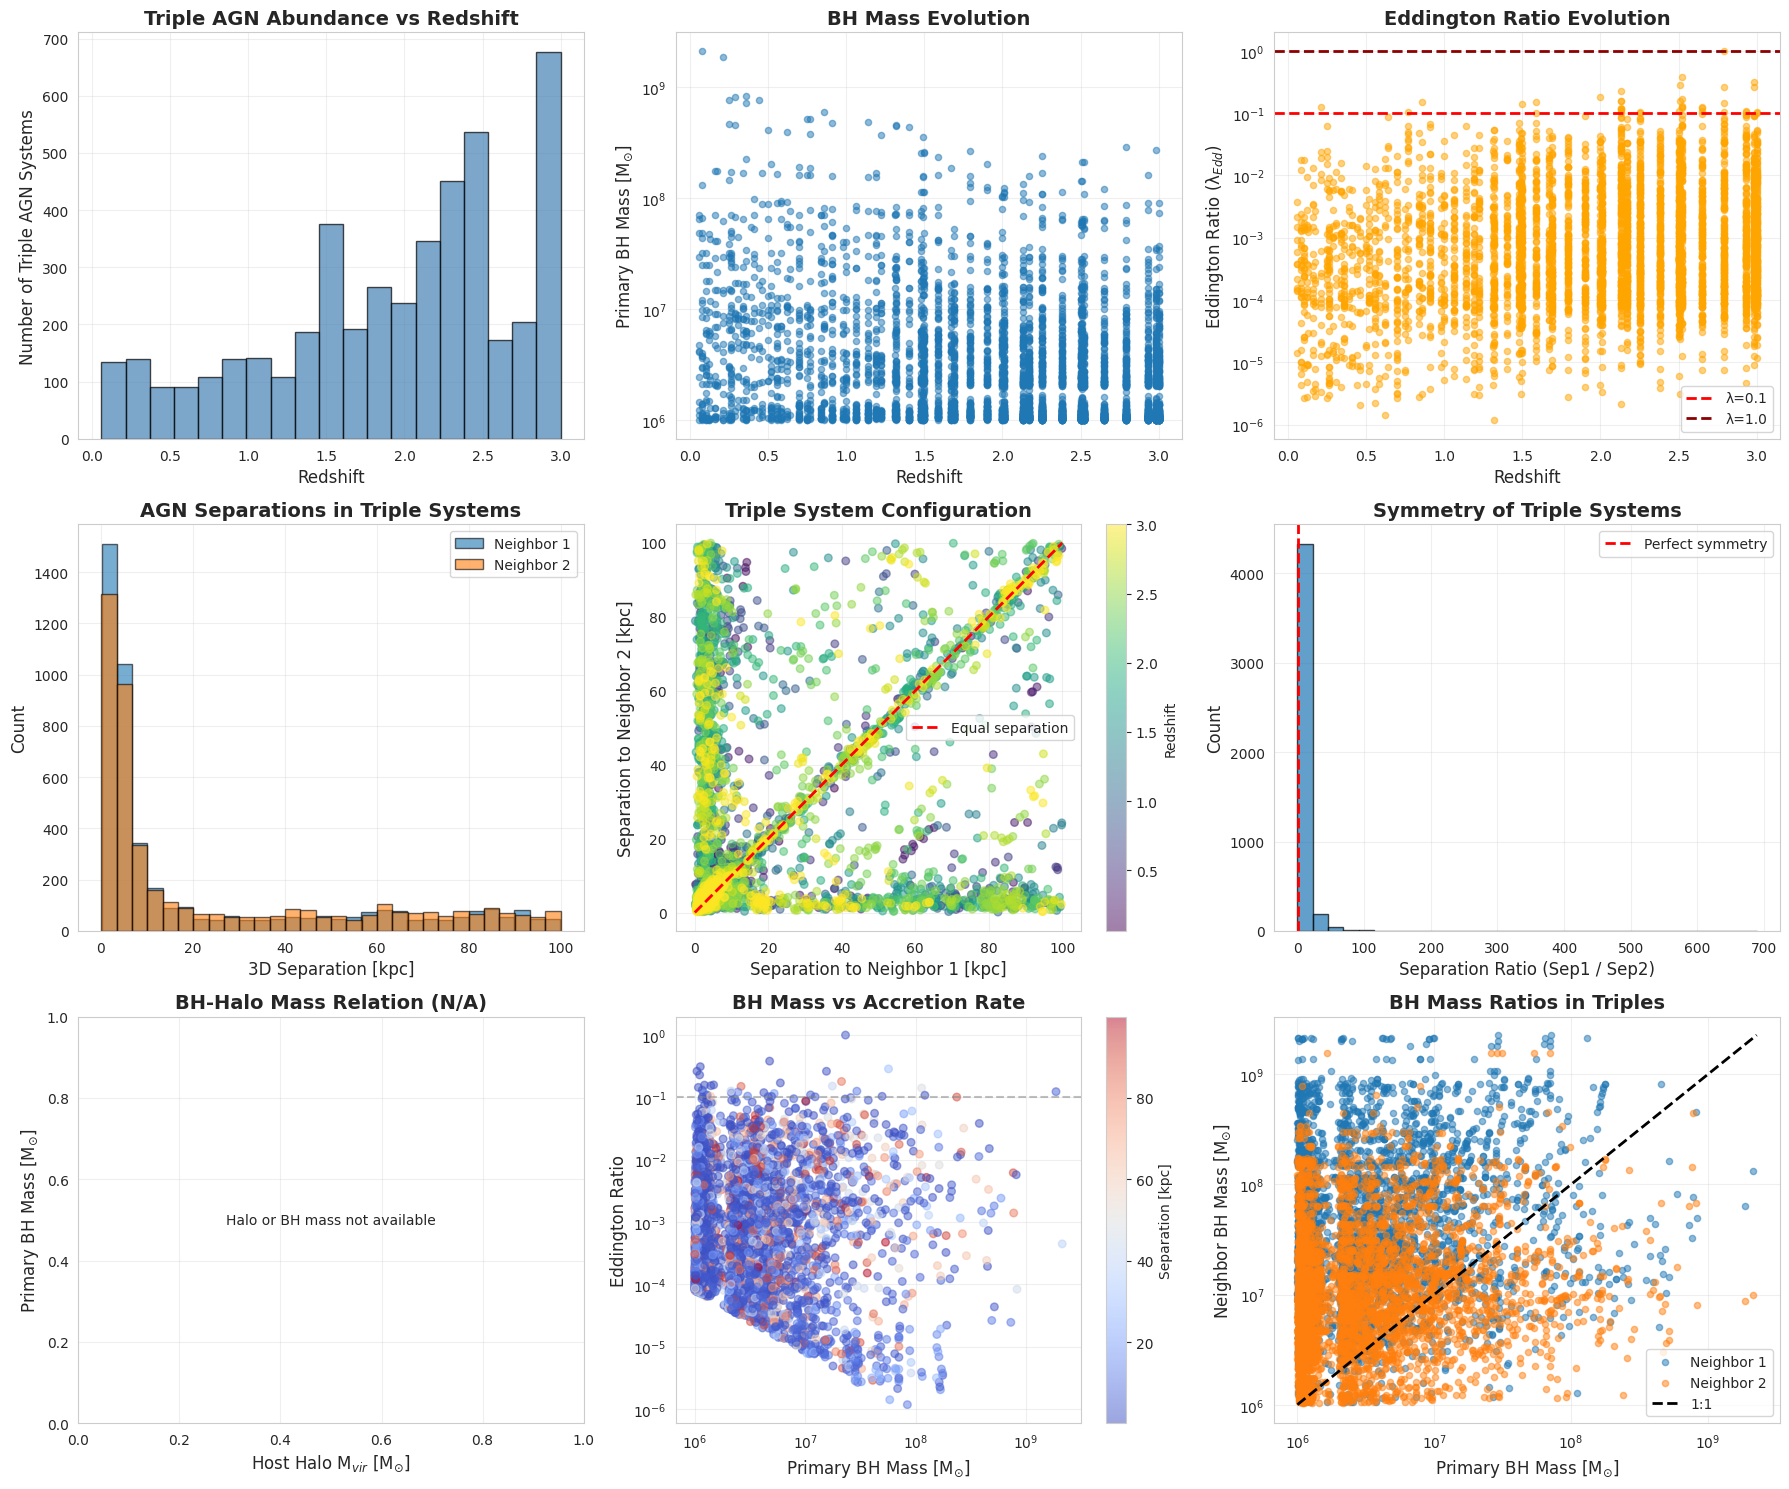


Analysis complete! Figure saved as 'triple_agn_analysis_overview.png'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

# ===================================================================
# STEP 1: Load all triple AGN catalogs
# ===================================================================
catalog_path = "/scratch/stlock/tripleAGNs/datasets/catalogue_only/"
catalog_files = sorted(glob.glob(os.path.join(catalog_path, "TripleAGN-Catalog-R100-z*.csv")))

print(f"Found {len(catalog_files)} catalog files\n")

# Load all catalogs and combine
all_catalogs = []
for file in catalog_files:
    # Extract redshift from filename
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    df['redshift'] = z
    all_catalogs.append(df)
    print(f"z={z:.2f}: {len(df)} triple AGN systems")

# Combine all snapshots
combined_df = pd.concat(all_catalogs, ignore_index=True)
print(f"\n{'='*60}")
print(f"TOTAL: {len(combined_df)} triple AGN systems across {len(catalog_files)} snapshots")
print(f"Redshift range: z = {combined_df['redshift'].min():.2f} to {combined_df['redshift'].max():.2f}")
print(f"{'='*60}\n")

# ===================================================================
# STEP 1.5: Inspect available columns
# ===================================================================
print("AVAILABLE COLUMNS IN CATALOG:")
print("="*60)
all_columns = combined_df.columns.tolist()
print(f"Total columns: {len(all_columns)}\n")

# Categorize columns
bh_cols = [col for col in all_columns if col.startswith('BH_') and not col.startswith('BH_id')]
neighbor1_cols = [col for col in all_columns if col.startswith('Neighbour1BH_')]
neighbor2_cols = [col for col in all_columns if col.startswith('Neighbour2BH_')]
halo_cols = [col for col in all_columns if col.startswith('Halo_')]
separation_cols = [col for col in all_columns if 'Separation' in col]

print(f"Primary BH columns ({len(bh_cols)}): {bh_cols[:5]}...")
print(f"Neighbor 1 columns ({len(neighbor1_cols)}): {neighbor1_cols[:3]}...")
print(f"Neighbor 2 columns ({len(neighbor2_cols)}): {neighbor2_cols[:3]}...")
print(f"Halo columns ({len(halo_cols)}): {halo_cols[:5]}...")
print(f"Separation columns ({len(separation_cols)}): {separation_cols}")
print(f"\n{'='*60}\n")

# Check for missing data
print("MISSING DATA SUMMARY:")
print("="*60)
missing_counts = combined_df.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
if len(missing_cols) > 0:
    print(missing_cols.head(10))
    print(f"\n... and {len(missing_cols) - 10} more columns with missing data" if len(missing_cols) > 10 else "")
else:
    print("No missing data detected!")
print(f"\n{'='*60}\n")

# ===================================================================
# STEP 2: Basic Statistics (with safe column access)
# ===================================================================
print("BASIC STATISTICS OF TRIPLE AGN SYSTEMS")
print("="*60)

# Helper function to safely access columns
def safe_stats(df, col_name, label):
    if col_name in df.columns and df[col_name].notna().any():
        valid_data = df[col_name].dropna()
        print(f"  {label}:")
        print(f"    Range: {valid_data.min():.2e} to {valid_data.max():.2e}")
        print(f"    Median: {valid_data.median():.2e}")
        print(f"    Valid entries: {len(valid_data)}/{len(df)}")
        return True
    else:
        print(f"  {label}: NOT AVAILABLE")
        return False

# BH properties
print("\nPrimary BH Properties:")
safe_stats(combined_df, 'BH_mass', 'BH Mass [M_sun]')
safe_stats(combined_df, 'BH_mdot', 'Accretion rate [M_sun/yr]')
safe_stats(combined_df, 'BH_Lbol', 'Bolometric luminosity [erg/s]')

# Calculate Eddington ratios if possible
if 'BH_Lbol' in combined_df.columns and 'BH_Ledd' in combined_df.columns:
    combined_df['lambda_Edd'] = combined_df['BH_Lbol'] / combined_df['BH_Ledd']
    safe_stats(combined_df, 'lambda_Edd', 'Eddington ratio (λ_Edd)')
else:
    print("  Eddington ratio: Cannot compute (missing L_bol or L_Edd)")

# Separation statistics
print("\nSeparation Statistics:")
safe_stats(combined_df, 'Separation_3D_kpc_1', 'Separation to Neighbor 1 (3D) [kpc]')
safe_stats(combined_df, 'Separation_3D_kpc_2', 'Separation to Neighbor 2 (3D) [kpc]')

# Host halo statistics
print("\nHost Halo Properties:")
has_halo_mvir = safe_stats(combined_df, 'Halo_Mvir', 'Halo M_vir [M_sun]')
has_halo_rvir = safe_stats(combined_df, 'Halo_Rvir', 'Halo R_vir [kpc]')

# ===================================================================
# STEP 3: Visualizations (adapted for available data)
# ===================================================================
# Determine which plots we can make
can_plot_halo = has_halo_mvir and has_halo_rvir
has_lambda = 'lambda_Edd' in combined_df.columns
has_neighbors = 'Neighbour1BH_mass' in combined_df.columns and 'Neighbour2BH_mass' in combined_df.columns

fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Row 1: Redshift evolution
ax = axes[0, 0]
z_bins = np.linspace(combined_df['redshift'].min(), combined_df['redshift'].max(), 20)
ax.hist(combined_df['redshift'], bins=z_bins, edgecolor='black', alpha=0.7, color='steelblue')
ax.set_xlabel('Redshift', fontsize=12)
ax.set_ylabel('Number of Triple AGN Systems', fontsize=12)
ax.set_title('Triple AGN Abundance vs Redshift', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
if 'BH_mass' in combined_df.columns:
    valid_data = combined_df[combined_df['BH_mass'].notna()]
    ax.scatter(valid_data['redshift'], valid_data['BH_mass'], alpha=0.5, s=20)
    ax.set_yscale('log')
    ax.set_title('BH Mass Evolution', fontsize=14, fontweight='bold')
else:
    ax.text(0.5, 0.5, 'BH_mass not available', ha='center', va='center', transform=ax.transAxes)
    ax.set_title('BH Mass Evolution (N/A)', fontsize=14, fontweight='bold')
ax.set_xlabel('Redshift', fontsize=12)
ax.set_ylabel('Primary BH Mass [M$_{\odot}$]', fontsize=12)
ax.grid(True, alpha=0.3)

ax = axes[0, 2]
if has_lambda:
    valid_data = combined_df[combined_df['lambda_Edd'].notna() & (combined_df['lambda_Edd'] > 0)]
    ax.scatter(valid_data['redshift'], valid_data['lambda_Edd'], alpha=0.5, s=20, c='orange')
    ax.set_yscale('log')
    ax.axhline(y=0.1, color='red', linestyle='--', label='λ=0.1', linewidth=2)
    ax.axhline(y=1.0, color='darkred', linestyle='--', label='λ=1.0', linewidth=2)
    ax.legend()
    ax.set_title('Eddington Ratio Evolution', fontsize=14, fontweight='bold')
else:
    ax.text(0.5, 0.5, 'λ_Edd not available', ha='center', va='center', transform=ax.transAxes)
    ax.set_title('Eddington Ratio (N/A)', fontsize=14, fontweight='bold')
ax.set_xlabel('Redshift', fontsize=12)
ax.set_ylabel('Eddington Ratio (λ$_{Edd}$)', fontsize=12)
ax.grid(True, alpha=0.3)

# Row 2: Separations and configurations
ax = axes[1, 0]
if 'Separation_3D_kpc_1' in combined_df.columns and 'Separation_3D_kpc_2' in combined_df.columns:
    sep1 = combined_df['Separation_3D_kpc_1'].dropna()
    sep2 = combined_df['Separation_3D_kpc_2'].dropna()
    ax.hist(sep1, bins=30, alpha=0.6, label='Neighbor 1', edgecolor='black')
    ax.hist(sep2, bins=30, alpha=0.6, label='Neighbor 2', edgecolor='black')
    ax.legend()
    ax.set_title('AGN Separations in Triple Systems', fontsize=14, fontweight='bold')
else:
    ax.text(0.5, 0.5, 'Separation data not available', ha='center', va='center', transform=ax.transAxes)
    ax.set_title('AGN Separations (N/A)', fontsize=14, fontweight='bold')
ax.set_xlabel('3D Separation [kpc]', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
if 'Separation_3D_kpc_1' in combined_df.columns and 'Separation_3D_kpc_2' in combined_df.columns:
    valid_data = combined_df[combined_df['Separation_3D_kpc_1'].notna() & combined_df['Separation_3D_kpc_2'].notna()]
    scatter = ax.scatter(valid_data['Separation_3D_kpc_1'], valid_data['Separation_3D_kpc_2'], 
               alpha=0.5, s=30, c=valid_data['redshift'], cmap='viridis')
    ax.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Equal separation')
    ax.legend()
    plt.colorbar(scatter, ax=ax, label='Redshift')
    ax.set_title('Triple System Configuration', fontsize=14, fontweight='bold')
else:
    ax.text(0.5, 0.5, 'Separation data not available', ha='center', va='center', transform=ax.transAxes)
    ax.set_title('System Configuration (N/A)', fontsize=14, fontweight='bold')
ax.set_xlabel('Separation to Neighbor 1 [kpc]', fontsize=12)
ax.set_ylabel('Separation to Neighbor 2 [kpc]', fontsize=12)
ax.grid(True, alpha=0.3)

ax = axes[1, 2]
if 'Separation_3D_kpc_1' in combined_df.columns and 'Separation_3D_kpc_2' in combined_df.columns:
    valid_data = combined_df[combined_df['Separation_3D_kpc_1'].notna() & 
                             combined_df['Separation_3D_kpc_2'].notna() &
                             (combined_df['Separation_3D_kpc_2'] > 0)]
    sep_ratio = valid_data['Separation_3D_kpc_1'] / valid_data['Separation_3D_kpc_2']
    ax.hist(sep_ratio, bins=30, edgecolor='black', alpha=0.7)
    ax.axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Perfect symmetry')
    ax.legend()
    ax.set_title('Symmetry of Triple Systems', fontsize=14, fontweight='bold')
else:
    ax.text(0.5, 0.5, 'Separation data not available', ha='center', va='center', transform=ax.transAxes)
    ax.set_title('System Symmetry (N/A)', fontsize=14, fontweight='bold')
ax.set_xlabel('Separation Ratio (Sep1 / Sep2)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.grid(True, alpha=0.3)

# Row 3: BH-Halo relations
ax = axes[2, 0]
if can_plot_halo and 'BH_mass' in combined_df.columns:
    valid_data = combined_df[combined_df['Halo_Mvir'].notna() & combined_df['BH_mass'].notna()]
    scatter = ax.scatter(valid_data['Halo_Mvir'], valid_data['BH_mass'], 
               alpha=0.5, s=30, c=valid_data['redshift'], cmap='plasma')
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.colorbar(scatter, ax=ax, label='Redshift')
    ax.set_title('BH-Halo Mass Relation', fontsize=14, fontweight='bold')
else:
    ax.text(0.5, 0.5, 'Halo or BH mass not available', ha='center', va='center', transform=ax.transAxes)
    ax.set_title('BH-Halo Mass Relation (N/A)', fontsize=14, fontweight='bold')
ax.set_xlabel('Host Halo M$_{vir}$ [M$_{\odot}$]', fontsize=12)
ax.set_ylabel('Primary BH Mass [M$_{\odot}$]', fontsize=12)
ax.grid(True, alpha=0.3)

ax = axes[2, 1]
if has_lambda and 'BH_mass' in combined_df.columns:
    valid_data = combined_df[(combined_df['BH_mass'].notna()) & 
                             (combined_df['lambda_Edd'].notna()) & 
                             (combined_df['lambda_Edd'] > 0) &
                             (combined_df['Separation_3D_kpc_1'].notna())]
    scatter = ax.scatter(valid_data['BH_mass'], valid_data['lambda_Edd'], 
               alpha=0.5, s=30, c=valid_data['Separation_3D_kpc_1'], cmap='coolwarm')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.axhline(y=0.1, color='gray', linestyle='--', alpha=0.5)
    plt.colorbar(scatter, ax=ax, label='Separation [kpc]')
    ax.set_title('BH Mass vs Accretion Rate', fontsize=14, fontweight='bold')
else:
    ax.text(0.5, 0.5, 'Data not available', ha='center', va='center', transform=ax.transAxes)
    ax.set_title('BH Mass vs Accretion (N/A)', fontsize=14, fontweight='bold')
ax.set_xlabel('Primary BH Mass [M$_{\odot}$]', fontsize=12)
ax.set_ylabel('Eddington Ratio', fontsize=12)
ax.grid(True, alpha=0.3)

ax = axes[2, 2]
if has_neighbors and 'BH_mass' in combined_df.columns:
    valid_data = combined_df[combined_df['BH_mass'].notna() & 
                             combined_df['Neighbour1BH_mass'].notna() & 
                             combined_df['Neighbour2BH_mass'].notna()]
    ax.scatter(valid_data['BH_mass'], valid_data['Neighbour1BH_mass'], 
               alpha=0.5, s=20, label='Neighbor 1')
    ax.scatter(valid_data['BH_mass'], valid_data['Neighbour2BH_mass'], 
               alpha=0.5, s=20, label='Neighbor 2')
    mass_range = [valid_data[['BH_mass', 'Neighbour1BH_mass', 'Neighbour2BH_mass']].min().min(),
                  valid_data[['BH_mass', 'Neighbour1BH_mass', 'Neighbour2BH_mass']].max().max()]
    ax.plot(mass_range, mass_range, 'k--', linewidth=2, label='1:1')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()
    ax.set_title('BH Mass Ratios in Triples', fontsize=14, fontweight='bold')
else:
    ax.text(0.5, 0.5, 'Neighbor BH data not available', ha='center', va='center', transform=ax.transAxes)
    ax.set_title('BH Mass Ratios (N/A)', fontsize=14, fontweight='bold')
ax.set_xlabel('Primary BH Mass [M$_{\odot}$]', fontsize=12)
ax.set_ylabel('Neighbor BH Mass [M$_{\odot}$]', fontsize=12)
ax.grid(True, alpha=0.3)

plt.tight_layout()
## plt.savefig('triple_agn_analysis_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("Analysis complete! Figure saved as 'triple_agn_analysis_overview.png'")
print("="*60)

In [2]:
import h5py
import numpy as np

# Check a halomap file
snap = '001270'  # First snapshot in your list
halomap_path = f'/scratch/stlock/tripleAGNs/halomap_files/HaloBH-TangosPynbodyMap-R25-snap{snap}.hdf5'

with h5py.File(halomap_path, 'r') as hf:
    pnb_haloid = np.array(hf['pynbody_haloid'])
    tng_haloid = np.array(hf['tangos_haloid'])
    bh_id = np.array(hf['BH_id'])
    
    print(f"Snapshot {snap} Halomap Summary:")
    print(f"Total BHs: {len(bh_id)}")
    print(f"BHs with valid pynbody halo ID (>0): {np.sum(pnb_haloid > 0)}")
    print(f"BHs with valid tangos halo ID (>0): {np.sum(tng_haloid > 0)}")
    print(f"\nSample of first 10 entries:")
    print(f"BH_id | pynbody_haloid | tangos_haloid")
    for i in range(min(10, len(bh_id))):
        print(f"{bh_id[i]:.0f} | {pnb_haloid[i]:.0f} | {tng_haloid[i]:.0f}")

Snapshot 001270 Halomap Summary:
Total BHs: 5761
BHs with valid pynbody halo ID (>0): 5705
BHs with valid tangos halo ID (>0): 5705

Sample of first 10 entries:
BH_id | pynbody_haloid | tangos_haloid
1981808650 | 74750 | 6
1981808660 | 74750 | 6
1981808662 | 96036 | 1889
1981808707 | 118037 | 196
1981808710 | 25021 | 1874
1981808747 | 57001 | 193
1981808778 | 12469 | 460
1981808782 | 42233 | 56
1981808792 | 99072 | 4
1981808794 | 99073 | 13


In [3]:
import pandas as pd
import numpy as np
import glob

# Load one of your catalogs
catalog_path = "/scratch/stlock/tripleAGNs/datasets/catalogue/"
catalog_files = sorted(glob.glob(catalog_path + "TripleAGN-Catalog-R100-z*.csv"))

# Pick the first catalog (should be z=1270 snapshot)
first_catalog = catalog_files[0]
print(f"Examining: {first_catalog}\n")

df = pd.read_csv(first_catalog)

print("="*70)
print("CATALOG STRUCTURE")
print("="*70)
print(f"Total triple AGN systems: {len(df)}")
print(f"Total columns: {len(df.columns)}\n")

print("Checking halo ID columns:")
print("-"*70)

# Check what halo-related columns exist
halo_id_cols = [col for col in df.columns if 'haloid' in col.lower() or 'halo_id' in col.lower()]
print(f"Halo ID columns found: {halo_id_cols}\n")

for col in halo_id_cols:
    values = df[col]
    print(f"{col}:")
    print(f"  Valid (>0): {np.sum(values > 0)}/{len(values)}")
    print(f"  Zero: {np.sum(values == 0)}")
    print(f"  NaN: {np.sum(values.isna())}")
    print(f"  Sample values: {values.head(5).tolist()}")
    print()

print("="*70)
print("CHECKING FOR HALO PROPERTY COLUMNS")
print("="*70)

halo_prop_cols = [col for col in df.columns if col.startswith('Halo_')]
print(f"Found {len(halo_prop_cols)} Halo property columns:")
if len(halo_prop_cols) > 0:
    print(halo_prop_cols[:10])
    print("\nSample of halo data:")
    print(df[halo_prop_cols[:5]].head())
else:
    print("NO HALO PROPERTY COLUMNS FOUND!")
    
print("\n" + "="*70)
print("POTENTIAL ISSUES")
print("="*70)

# Check if halo IDs are present but halo properties are missing
if len(halo_id_cols) > 0 and len(halo_prop_cols) == 0:
    print("⚠️  ISSUE IDENTIFIED:")
    print("   - Halo IDs ARE present in the catalog")
    print("   - But NO halo properties were computed")
    print("\nThis means compute_halo_environment_properties() failed or was skipped")
    print("\nPossible causes:")
    print("1. AHF halo catalog not loading: h = sim.halos(ahf_mpi=True)")
    print("2. Exception in halo processing loop (try-except catching all errors)")
    print("3. Halo finder_id doesn't match between Tangos and Pynbody halos")
    print("4. All halos failed individual processing")

# Check the actual values being passed
print("\n" + "="*70)
print("HALO ID VALUES IN TRIPLE AGN CATALOG")
print("="*70)

if 'pynbody_haloid' in df.columns:
    pnb_ids = df['pynbody_haloid'].values
    print(f"\nPrimary BH pynbody_haloid statistics:")
    print(f"  Min: {np.min(pnb_ids)}")
    print(f"  Max: {np.max(pnb_ids)}")
    print(f"  Median: {np.median(pnb_ids)}")
    print(f"  Mean: {np.mean(pnb_ids)}")
    print(f"  Unique values: {len(np.unique(pnb_ids))}")
    
    # Check if these look like valid halo IDs
    if np.all(pnb_ids > 0):
        print(f"\n✓ All halo IDs are positive (look valid)")
    if np.any(pnb_ids > 1e6):
        print(f"\n⚠️  Some halo IDs are very large (>1M) - might be issue")
        print(f"   Large values: {pnb_ids[pnb_ids > 1e6][:5]}")

# Check neighbor halo IDs too
if 'Neighbour1BH_pynbody_haloid' in df.columns:
    n1_ids = df['Neighbour1BH_pynbody_haloid'].values
    print(f"\nNeighbor 1 pynbody_haloid statistics:")
    print(f"  Valid (>0): {np.sum(n1_ids > 0)}/{len(n1_ids)}")
    print(f"  Sample: {n1_ids[:5]}")

if 'Neighbour2BH_pynbody_haloid' in df.columns:
    n2_ids = df['Neighbour2BH_pynbody_haloid'].values
    print(f"\nNeighbor 2 pynbody_haloid statistics:")
    print(f"  Valid (>0): {np.sum(n2_ids > 0)}/{len(n2_ids)}")
    print(f"  Sample: {n2_ids[:5]}")

print("\n" + "="*70)
print("RECOMMENDATION")
print("="*70)
print("""
The halo IDs are being correctly extracted from Tangos and matched to BHs,
but the compute_halo_environment_properties() function is failing to 
compute the actual halo properties.

Next steps:
1. Check the log files in /scratch/stlock/tripleAGNs/outputs/
2. Look for error messages related to halo loading or processing
3. The issue is likely in the line: h = sim.halos(ahf_mpi=True)
   or in the individual halo processing loop
""")

IndexError: list index out of range

In [ ]:
import h5py
import pynbody as pnb
import numpy as np

# Load the halomap file for snapshot 001280
snap = '001280'
halomap_path = f'/scratch/stlock/tripleAGNs/halomap_files/HaloBH-TangosPynbodyMap-R25-snap{snap}.hdf5'

print("="*70)
print("CHECKING HALOMAP FILE")
print("="*70)

with h5py.File(halomap_path, 'r') as hf:
    pnb_haloid = np.array(hf['pynbody_haloid'])
    tng_haloid = np.array(hf['tangos_haloid'])
    bh_id = np.array(hf['BH_id'])
    
    print(f"\nTotal BHs in halomap: {len(bh_id)}")
    print(f"BHs with valid pynbody_haloid (>0): {np.sum(pnb_haloid > 0)}")
    
    # Look at the halo IDs from our triple AGN systems
    target_finder_ids = [53359, 50825, 19252]
    
    print(f"\n" + "="*70)
    print("TRACKING TARGET HALO IDs FROM TRIPLE AGN CATALOG")
    print("="*70)
    
    for target_id in target_finder_ids:
        # Find BHs in this halo
        mask = pnb_haloid == target_id
        num_bhs = np.sum(mask)
        
        print(f"\nHalo pynbody_haloid = {target_id}:")
        print(f"  Number of BHs in this halo: {num_bhs}")
        
        if num_bhs > 0:
            # Get the tangos_haloid for this halo
            tangos_ids = tng_haloid[mask]
            unique_tangos = np.unique(tangos_ids)
            print(f"  Tangos halo_number(s): {unique_tangos}")
            print(f"  Sample BH IDs in this halo: {bh_id[mask][:5]}")

print("\n" + "="*70)
print("UNDERSTANDING THE MISMATCH")
print("="*70)

print("""
The finder_id values (53359, 50825, 19252) stored in the halomap are 
NOT the same as the AHF halo IDs (which are huge 64-bit integers).

These finder_ids likely come from Tangos, which may use a different 
indexing scheme. Let's check where Tangos gets these values from.
""")

# Load the simulation and check Pynbody halo structure
print("="*70)
print("LOADING SNAPSHOT AND CHECKING HALO STRUCTURE")
print("="*70)

sim_path = "/home/stlock/projects/rrg-babul-ad/SHARED/Romulus/cosmo25/"
file_path = f"{sim_path}cosmo25p.768sg1bwK1BHe75.{snap}"

print(f"\nLoading snapshot {snap}...")
s = pnb.load(file_path)
s.physical_units()

print("\nLoading AHF halo catalog...")
h = s.halos(ahf_mpi=True)
print(f"Total halos: {len(h)}")

# The keys are the AHF IDs
ahf_ids = list(h.keys())
print(f"\nAHF IDs range: {min(ahf_ids)} to {max(ahf_ids)}")
print(f"Sample AHF IDs: {ahf_ids[:5]}")

# Create a sorted list by mass to see if finder_id is a rank
print("\n" + "="*70)
print("HYPOTHESIS: finder_id might be halo rank by mass")
print("="*70)

# Load halo masses
print("\nLoading halo masses (this may take a moment)...")
halo_data = []
for i, ahf_id in enumerate(ahf_ids[:1000]):  # Sample first 1000 to save time
    try:
        halo = h[ahf_id]
        mass = halo['mass'].sum()
        halo_data.append((ahf_id, mass, i))
    except:
        pass

# Sort by mass
halo_data_sorted = sorted(halo_data, key=lambda x: x[1], reverse=True)

print(f"\nTop 10 halos by mass:")
print("Rank | AHF_ID | Mass")
print("-"*50)
for rank, (ahf_id, mass, orig_idx) in enumerate(halo_data_sorted[:10]):
    print(f"{rank:4d} | {ahf_id} | {mass:.2e}")

print(f"\n" + "="*70)
print("CHECKING IF TANGOS USES MASS-RANKED INDICES")
print("="*70)

# Check if our target finder_ids (53359, 50825, 19252) could be ranks
print(f"\nOur target finder_ids: {target_finder_ids}")
print(f"If these were ranks, they'd be halos ranked ~19252 to ~53359 by mass")
print(f"Total halos in catalog: {len(h)}")
print(f"This seems plausible!")

print(f"\n" + "="*70)
print("RECOMMENDATION")
print("="*70)

print("""
The 'finder_id' stored by Tangos does NOT match AHF's native halo IDs.

Possible explanations:
1. Tangos uses mass-ranked indices (most likely)
2. Tangos uses a different halo finder output
3. There's a remapping in the Tangos database

To fix this, we need to:
1. Query Tangos directly for the halo properties
2. OR find the mapping file Tangos uses
3. OR access halos through Tangos API instead of Pynbody

The cleanest solution: Get halo properties directly from Tangos database
instead of trying to access Pynbody halos by finder_id.
""")

CHECKING HALOMAP FILE

Total BHs in halomap: 5754
BHs with valid pynbody_haloid (>0): 5684

TRACKING TARGET HALO IDs FROM TRIPLE AGN CATALOG

Halo pynbody_haloid = 53359:
  Number of BHs in this halo: 0

Halo pynbody_haloid = 50825:
  Number of BHs in this halo: 0

Halo pynbody_haloid = 19252:
  Number of BHs in this halo: 0

UNDERSTANDING THE MISMATCH

The finder_id values (53359, 50825, 19252) stored in the halomap are 
NOT the same as the AHF halo IDs (which are huge 64-bit integers).

These finder_ids likely come from Tangos, which may use a different 
indexing scheme. Let's check where Tangos gets these values from.

LOADING SNAPSHOT AND CHECKING HALO STRUCTURE

Loading snapshot 001280...

Loading AHF halo catalog...


pynbody.halo : Unable to load AHF substructure file; continuing without. To expose the underlying problem as an exception, pass ignore_missing_substructure=False to the AHFCatalogue constructor


Total halos: 121207

AHF IDs range: 2305867716211908776 to 8054112910083875674
Sample AHF IDs: [5885466102063010306, 5875081236190416230, 5886286329141111643, 6006775152882347236, 5970595748476213750]

HYPOTHESIS: finder_id might be halo rank by mass

Loading halo masses (this may take a moment)...


/home/stlock/.venvs/romulus_env/lib/python3.11/site-packages/pynbody/halo/__init__.py:274: RuntimeWarning: Accessing multiple halos may be more efficient if you call load_all() on the halo catalogue
  warnings.warn("Accessing multiple halos may be more efficient if you call load_all() on the "



Top 10 halos by mass:
Rank | AHF_ID | Mass
--------------------------------------------------
   0 | 5885466102063010306 | 8.48e+10
   1 | 5875081236190416230 | 5.40e+10
   2 | 5886286329141111643 | 5.26e+10
   3 | 6006775152882347236 | 4.09e+10
   4 | 5970595748476213750 | 3.95e+10
   5 | 5849224073732702366 | 3.60e+10
   6 | 5924355790464980090 | 3.41e+10
   7 | 5800199928679555654 | 3.32e+10
   8 | 4840630941998227683 | 3.02e+10
   9 | 4792404173148760069 | 2.74e+10

CHECKING IF TANGOS USES MASS-RANKED INDICES

Our target finder_ids: [53359, 50825, 19252]
If these were ranks, they'd be halos ranked ~19252 to ~53359 by mass
Total halos in catalog: 121207
This seems plausible!

RECOMMENDATION

The 'finder_id' stored by Tangos does NOT match AHF's native halo IDs.

Possible explanations:
1. Tangos uses mass-ranked indices (most likely)
2. Tangos uses a different halo finder output
3. There's a remapping in the Tangos database

To fix this, we need to:
1. Query Tangos directly for the 

In [ ]:
import pandas as pd
import h5py
import numpy as np

# The snapshot list from your code
snapshot_list = ['000098','000105','000111','000118','000126','000134','000142','000151','000160','000170','000181',
            '000192','000204','000216','000229','000243','000256','000258','000274','000290','000308',
            '000372','000437','000446',
            '000463','000491','000512','000520','000547','000551','000584','000618','000655',
            '000690','000694','000735','000768','000778','000824','000873','000909','000924','000979','001024',
            '001036','001065','001097','001162','001230','001270','001280',
            '001302','001378','001458','001536','001543','001550','001632','001726','001792','001826','001931','001945',
            '002042','002048','002159','002281','002304','002411','002536','002547','002560','002690','002816','002840',
            '002998','003072','003163','003328','003336','003478','003517','003584','003707','003840','003905','004096',
            '004111','004173','004326','004352','004549','004608','004781','004864','005022','005107','005120','005271',
            '005376','005529','005632','005795','005888','006069','006144','006350','006390','006400','006640','006656',
            '006912','006937','007168','007212','007241','007394','007424','007552','007680','007779','007869','007936',
            '008192']

print("="*70)
print("CHECKING SNAPSHOT INDEX vs CATALOG REDSHIFT")
print("="*70)

# The first catalog file
catalog_file = "/scratch/stlock/tripleAGNs/datasets/catalogue/TripleAGN-Catalog-R100-z0.06.csv"
df = pd.read_csv(catalog_file)

print(f"\nCatalog file: {catalog_file}")
print(f"Redshift in filename: z=0.06")
print(f"Number of triple AGN systems: {len(df)}")

# Sample halo IDs from this catalog
sample_halo_ids = df['pynbody_haloid'].unique()[:3]
print(f"\nSample halo IDs from catalog: {sample_halo_ids}")

print("\n" + "="*70)
print("CHECKING WHICH SNAPSHOT THIS CATALOG CORRESPONDS TO")
print("="*70)

# The catalog was created with snapshot_index from the array job
# Array job runs 50-119, which maps to snapshot_list[50] through snapshot_list[119]

print("\nArray indices 50-60 correspond to these snapshots:")
print("-"*70)
for i in range(50, 61):
    snap = snapshot_list[i]
    print(f"  Index {i}: snapshot {snap}")

print("\n" + "="*70)
print("CHECKING HALOMAP FILES FOR THESE SNAPSHOTS")
print("="*70)

# Check which halomap files exist and which contain our target halo IDs
target_halos = [53359.0, 50825.0, 19252.0]

print(f"\nLooking for halos: {target_halos}")
print("-"*70)

found_in_snapshots = []

for i in range(50, 61):
    snap = snapshot_list[i]
    halomap_path = f'/scratch/stlock/tripleAGNs/halomap_files/HaloBH-TangosPynbodyMap-R25-snap{snap}.hdf5'
    
    try:
        with h5py.File(halomap_path, 'r') as hf:
            pnb_haloid = np.array(hf['pynbody_haloid'])
            
            # Check if our target halos are in this snapshot
            found_halos = [h for h in target_halos if h in pnb_haloid]
            
            if len(found_halos) > 0:
                print(f"\n  Snapshot {snap} (index {i}):")
                for halo_id in found_halos:
                    num_bhs = np.sum(pnb_haloid == halo_id)
                    print(f"    Halo {int(halo_id)}: {num_bhs} BHs")
                found_in_snapshots.append((i, snap, len(found_halos)))
    except FileNotFoundError:
        print(f"  Snapshot {snap} (index {i}): HALOMAP FILE NOT FOUND")
    except Exception as e:
        print(f"  Snapshot {snap} (index {i}): Error - {e}")

print("\n" + "="*70)
print("DIAGNOSIS")
print("="*70)

if len(found_in_snapshots) > 0:
    print(f"\n✓ Target halos FOUND in {len(found_in_snapshots)} snapshot(s):")
    for idx, snap, num_found in found_in_snapshots:
        print(f"  Index {idx}: snapshot {snap} ({num_found} halos)")
    
    print(f"\nThe triple AGN catalog (z=0.06) likely corresponds to:")
    best_idx, best_snap, _ = found_in_snapshots[0]
    print(f"  Snapshot index: {best_idx}")
    print(f"  Snapshot: {best_snap}")
    
    print(f"\n⚠️  ISSUE: You're running with index 50 (snapshot {snapshot_list[50]})")
    print(f"         But the catalog might be from index {best_idx} (snapshot {best_snap})")
else:
    print(f"\n✗ Target halos NOT FOUND in any snapshot 50-60")
    print(f"   They may be in a different snapshot range")

print("\n" + "="*70)
print("ACTION ITEM")
print("="*70)
print("""
Check your SLURM array job settings:
- Halomap.sh runs: --array=110-120
- build_tripleagn_catalog.sh runs: --array=50-119

If they're processing different snapshot ranges, the halo IDs won't match!

Both jobs should process THE SAME snapshot indices for consistency.
""")

CHECKING SNAPSHOT INDEX vs CATALOG REDSHIFT

Catalog file: /scratch/stlock/tripleAGNs/datasets/catalogue/TripleAGN-Catalog-R100-z0.06.csv
Redshift in filename: z=0.06
Number of triple AGN systems: 12

Sample halo IDs from catalog: [53359. 50825. 19252.]

CHECKING WHICH SNAPSHOT THIS CATALOG CORRESPONDS TO

Array indices 50-60 correspond to these snapshots:
----------------------------------------------------------------------
  Index 50: snapshot 001280
  Index 51: snapshot 001302
  Index 52: snapshot 001378
  Index 53: snapshot 001458
  Index 54: snapshot 001536
  Index 55: snapshot 001543
  Index 56: snapshot 001550
  Index 57: snapshot 001632
  Index 58: snapshot 001726
  Index 59: snapshot 001792
  Index 60: snapshot 001826

CHECKING HALOMAP FILES FOR THESE SNAPSHOTS

Looking for halos: [53359.0, 50825.0, 19252.0]
----------------------------------------------------------------------

  Snapshot 001550 (index 56):
    Halo 53359: 1 BHs

DIAGNOSIS

✓ Target halos FOUND in 1 snapshot

Found 61 catalog files
Redshift range: z=0.06 to z=3.00
z=0.06: 12 triple AGN systems
z=0.08: 28 triple AGN systems
z=0.10: 26 triple AGN systems
z=0.12: 15 triple AGN systems
z=0.13: 6 triple AGN systems
z=0.16: 20 triple AGN systems
z=0.17: 11 triple AGN systems
z=0.21: 17 triple AGN systems
z=0.25: 20 triple AGN systems
z=0.26: 43 triple AGN systems
z=0.29: 12 triple AGN systems
z=0.31: 13 triple AGN systems
z=0.34: 23 triple AGN systems
z=0.36: 29 triple AGN systems
z=0.39: 10 triple AGN systems
z=0.41: 17 triple AGN systems
z=0.44: 11 triple AGN systems
z=0.46: 14 triple AGN systems
z=0.50: 13 triple AGN systems
z=0.52: 26 triple AGN systems
z=0.56: 34 triple AGN systems
z=0.58: 23 triple AGN systems
z=0.62: 23 triple AGN systems
z=0.64: 10 triple AGN systems
z=0.70: 54 triple AGN systems
z=0.75: 23 triple AGN systems
z=0.77: 31 triple AGN systems
z=0.84: 33 triple AGN systems
z=0.86: 27 triple AGN systems
z=0.91: 56 triple AGN systems
z=0.98: 24 triple AGN systems
z=1.00: 31 trip

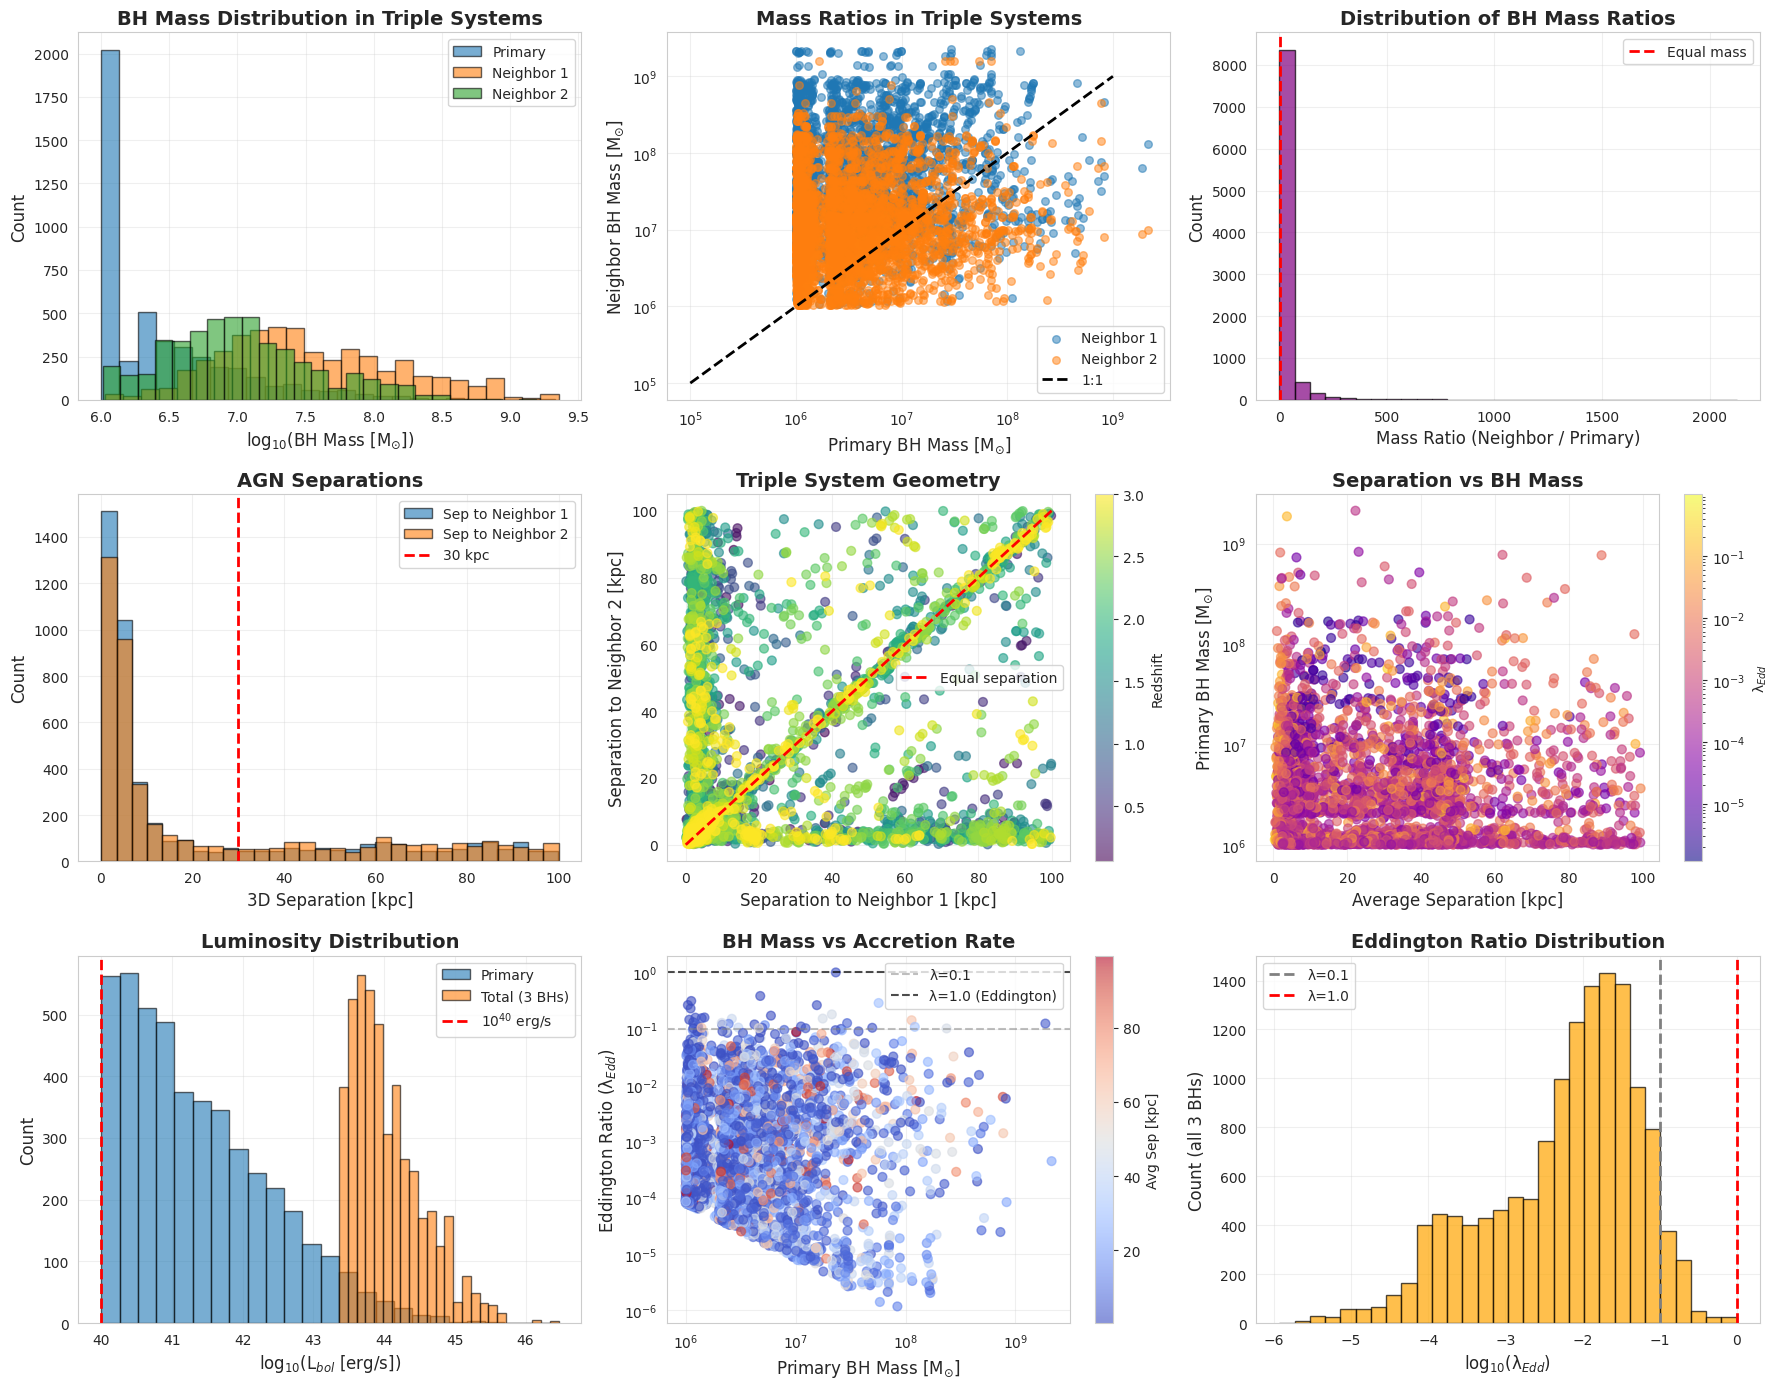


Analysis complete! Figure saved as 'triple_agn_mass_sep_lum_analysis.png'


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (18, 12)

# ===================================================================
# STEP 1: Load all available catalogs
# ===================================================================
catalog_path = "/scratch/stlock/tripleAGNs/datasets/catalogue_only/"
catalog_files = sorted(glob.glob(catalog_path + "TripleAGN-Catalog-R100-z*.csv"))

print(f"Found {len(catalog_files)} catalog files")
print(f"Redshift range: z={catalog_files[0].split('z')[-1].replace('.csv','')} to z={catalog_files[-1].split('z')[-1].replace('.csv','')}")
print("="*70)

# Load all catalogs
all_catalogs = []
for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    df['redshift'] = z
    all_catalogs.append(df)
    print(f"z={z:.2f}: {len(df)} triple AGN systems")

combined_df = pd.concat(all_catalogs, ignore_index=True)

print(f"\n{'='*70}")
print(f"TOTAL: {len(combined_df)} triple AGN systems")
print(f"Redshift range: z={combined_df['redshift'].min():.2f} to z={combined_df['redshift'].max():.2f}")
print(f"{'='*70}\n")

# ===================================================================
# STEP 2: Calculate derived quantities
# ===================================================================
print("Computing derived quantities...")

# Eddington ratios
combined_df['lambda_Edd'] = combined_df['BH_Lbol'] / combined_df['BH_Ledd']
combined_df['Neighbour1_lambda_Edd'] = combined_df['Neighbour1BH_Lbol'] / combined_df['Neighbour1BH_Ledd']
combined_df['Neighbour2_lambda_Edd'] = combined_df['Neighbour2BH_Lbol'] / combined_df['Neighbour2BH_Ledd']

# Mass ratios
combined_df['mass_ratio_1'] = combined_df['Neighbour1BH_mass'] / combined_df['BH_mass']
combined_df['mass_ratio_2'] = combined_df['Neighbour2BH_mass'] / combined_df['BH_mass']

# Average separation
combined_df['avg_separation'] = (combined_df['Separation_3D_kpc_1'] + combined_df['Separation_3D_kpc_2']) / 2

# Total luminosity of the triple
combined_df['total_Lbol'] = combined_df['BH_Lbol'] + combined_df['Neighbour1BH_Lbol'] + combined_df['Neighbour2BH_Lbol']

print("Done!\n")

# ===================================================================
# STEP 3: Summary Statistics
# ===================================================================
print("="*70)
print("TRIPLE AGN SYSTEM STATISTICS")
print("="*70)

print("\n1. BLACK HOLE MASSES")
print("-"*70)
print(f"Primary BH mass:")
print(f"  Range: {combined_df['BH_mass'].min():.2e} - {combined_df['BH_mass'].max():.2e} M_sun")
print(f"  Median: {combined_df['BH_mass'].median():.2e} M_sun")
print(f"  Mean: {combined_df['BH_mass'].mean():.2e} M_sun")

print(f"\nNeighbor 1 BH mass:")
print(f"  Median: {combined_df['Neighbour1BH_mass'].median():.2e} M_sun")
print(f"\nNeighbor 2 BH mass:")
print(f"  Median: {combined_df['Neighbour2BH_mass'].median():.2e} M_sun")

print(f"\nMass ratios (Neighbor/Primary):")
print(f"  Neighbor 1: {combined_df['mass_ratio_1'].median():.3f} (median)")
print(f"  Neighbor 2: {combined_df['mass_ratio_2'].median():.3f} (median)")

print("\n2. SEPARATIONS")
print("-"*70)
print(f"Separation to Neighbor 1:")
print(f"  Range: {combined_df['Separation_3D_kpc_1'].min():.1f} - {combined_df['Separation_3D_kpc_1'].max():.1f} kpc")
print(f"  Median: {combined_df['Separation_3D_kpc_1'].median():.1f} kpc")

print(f"\nSeparation to Neighbor 2:")
print(f"  Range: {combined_df['Separation_3D_kpc_2'].min():.1f} - {combined_df['Separation_3D_kpc_2'].max():.1f} kpc")
print(f"  Median: {combined_df['Separation_3D_kpc_2'].median():.1f} kpc")

print(f"\nAverage separation:")
print(f"  Median: {combined_df['avg_separation'].median():.1f} kpc")

# Count close pairs (< 30 kpc)
close_pairs_1 = np.sum(combined_df['Separation_3D_kpc_1'] < 30)
close_pairs_2 = np.sum(combined_df['Separation_3D_kpc_2'] < 30)
print(f"\nClose pairs (< 30 kpc):")
print(f"  Neighbor 1: {close_pairs_1} ({100*close_pairs_1/len(combined_df):.1f}%)")
print(f"  Neighbor 2: {close_pairs_2} ({100*close_pairs_2/len(combined_df):.1f}%)")

print("\n3. LUMINOSITIES & EDDINGTON RATIOS")
print("-"*70)
print(f"Primary BH luminosity:")
print(f"  Range: {combined_df['BH_Lbol'].min():.2e} - {combined_df['BH_Lbol'].max():.2e} erg/s")
print(f"  Median: {combined_df['BH_Lbol'].median():.2e} erg/s")

print(f"\nTotal triple system luminosity:")
print(f"  Median: {combined_df['total_Lbol'].median():.2e} erg/s")
print(f"  Max: {combined_df['total_Lbol'].max():.2e} erg/s")

print(f"\nEddington ratios (λ_Edd):")
print(f"  Primary: {combined_df['lambda_Edd'].median():.3f} (median)")
print(f"  Neighbor 1: {combined_df['Neighbour1_lambda_Edd'].median():.3f} (median)")
print(f"  Neighbor 2: {combined_df['Neighbour2_lambda_Edd'].median():.3f} (median)")

# Count super-Eddington systems
super_edd = np.sum(combined_df['lambda_Edd'] > 1.0)
print(f"\nSuper-Eddington primary BHs (λ > 1): {super_edd} ({100*super_edd/len(combined_df):.1f}%)")

# ===================================================================
# STEP 4: Visualizations
# ===================================================================
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

# Row 1: Mass distributions and relationships
ax = axes[0, 0]
ax.hist(np.log10(combined_df['BH_mass']), bins=25, alpha=0.6, label='Primary', edgecolor='black')
ax.hist(np.log10(combined_df['Neighbour1BH_mass']), bins=25, alpha=0.6, label='Neighbor 1', edgecolor='black')
ax.hist(np.log10(combined_df['Neighbour2BH_mass']), bins=25, alpha=0.6, label='Neighbor 2', edgecolor='black')
ax.set_xlabel('log$_{10}$(BH Mass [M$_{\odot}$])', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('BH Mass Distribution in Triple Systems', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 1]
ax.scatter(combined_df['BH_mass'], combined_df['Neighbour1BH_mass'], alpha=0.5, s=30, label='Neighbor 1')
ax.scatter(combined_df['BH_mass'], combined_df['Neighbour2BH_mass'], alpha=0.5, s=30, label='Neighbor 2')
ax.plot([1e5, 1e9], [1e5, 1e9], 'k--', linewidth=2, label='1:1')
ax.set_xlabel('Primary BH Mass [M$_{\odot}$]', fontsize=12)
ax.set_ylabel('Neighbor BH Mass [M$_{\odot}$]', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Mass Ratios in Triple Systems', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[0, 2]
mass_ratios = np.concatenate([combined_df['mass_ratio_1'], combined_df['mass_ratio_2']])
ax.hist(mass_ratios, bins=30, edgecolor='black', alpha=0.7, color='purple')
ax.axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Equal mass')
ax.set_xlabel('Mass Ratio (Neighbor / Primary)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of BH Mass Ratios', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

# Row 2: Separations
ax = axes[1, 0]
ax.hist(combined_df['Separation_3D_kpc_1'], bins=30, alpha=0.6, label='Sep to Neighbor 1', edgecolor='black')
ax.hist(combined_df['Separation_3D_kpc_2'], bins=30, alpha=0.6, label='Sep to Neighbor 2', edgecolor='black')
ax.axvline(x=30, color='red', linestyle='--', linewidth=2, label='30 kpc')
ax.set_xlabel('3D Separation [kpc]', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('AGN Separations', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[1, 1]
scatter = ax.scatter(combined_df['Separation_3D_kpc_1'], combined_df['Separation_3D_kpc_2'],
                     c=combined_df['redshift'], cmap='viridis', alpha=0.6, s=40)
ax.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Equal separation')
ax.set_xlabel('Separation to Neighbor 1 [kpc]', fontsize=12)
ax.set_ylabel('Separation to Neighbor 2 [kpc]', fontsize=12)
ax.set_title('Triple System Geometry', fontsize=14, fontweight='bold')
ax.legend()
plt.colorbar(scatter, ax=ax, label='Redshift')
ax.grid(True, alpha=0.3)

ax = axes[1, 2]
ax.scatter(combined_df['avg_separation'], combined_df['BH_mass'], 
           c=combined_df['lambda_Edd'], cmap='plasma', alpha=0.6, s=40, norm=plt.matplotlib.colors.LogNorm())
ax.set_xlabel('Average Separation [kpc]', fontsize=12)
ax.set_ylabel('Primary BH Mass [M$_{\odot}$]', fontsize=12)
ax.set_yscale('log')
ax.set_title('Separation vs BH Mass', fontsize=14, fontweight='bold')
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('λ$_{Edd}$', fontsize=10)
ax.grid(True, alpha=0.3)

# Row 3: Luminosities and Eddington ratios
ax = axes[2, 0]
ax.hist(np.log10(combined_df['BH_Lbol']), bins=25, alpha=0.6, label='Primary', edgecolor='black')
ax.hist(np.log10(combined_df['total_Lbol']), bins=25, alpha=0.6, label='Total (3 BHs)', edgecolor='black')
ax.axvline(x=40, color='red', linestyle='--', linewidth=2, label='10$^{40}$ erg/s')
ax.set_xlabel('log$_{10}$(L$_{bol}$ [erg/s])', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Luminosity Distribution', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

ax = axes[2, 1]
ax.scatter(combined_df['BH_mass'], combined_df['lambda_Edd'], 
           c=combined_df['avg_separation'], cmap='coolwarm', alpha=0.6, s=40)
ax.axhline(y=0.1, color='gray', linestyle='--', alpha=0.5, label='λ=0.1')
ax.axhline(y=1.0, color='black', linestyle='--', alpha=0.7, label='λ=1.0 (Eddington)')
ax.set_xlabel('Primary BH Mass [M$_{\odot}$]', fontsize=12)
ax.set_ylabel('Eddington Ratio (λ$_{Edd}$)', fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('BH Mass vs Accretion Rate', fontsize=14, fontweight='bold')
ax.legend()
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('Avg Sep [kpc]', fontsize=10)
ax.grid(True, alpha=0.3)

ax = axes[2, 2]
edd_ratios = np.concatenate([
    combined_df['lambda_Edd'].values,
    combined_df['Neighbour1_lambda_Edd'].values,
    combined_df['Neighbour2_lambda_Edd'].values
])
ax.hist(np.log10(edd_ratios[edd_ratios > 0]), bins=30, edgecolor='black', alpha=0.7, color='orange')
ax.axvline(x=-1, color='gray', linestyle='--', linewidth=2, label='λ=0.1')
ax.axvline(x=0, color='red', linestyle='--', linewidth=2, label='λ=1.0')
ax.set_xlabel('log$_{10}$(λ$_{Edd}$)', fontsize=12)
ax.set_ylabel('Count (all 3 BHs)', fontsize=12)
ax.set_title('Eddington Ratio Distribution', fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
## plt.savefig('triple_agn_mass_sep_lum_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("Analysis complete! Figure saved as 'triple_agn_mass_sep_lum_analysis.png'")
print("="*70)

In [ ]:
import pandas as pd
import glob

# Path to catalog files
catalog_path = "/scratch/stlock/tripleAGNs/datasets/catalogue_only/"
catalog_files = sorted(glob.glob(catalog_path + "TripleAGN-Catalog-R100-z*.csv"))

print("="*70)
print("TRIPLE AGN SYSTEM COUNT")
print("="*70)

# Count systems per file
total_systems = 0
redshift_data = []

for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    num_systems = len(df)
    total_systems += num_systems
    redshift_data.append((z, num_systems))
    print(f"z={z:.2f}: {num_systems:4d} triple AGN systems")

print("="*70)
print(f"\nTOTAL TRIPLE AGN SYSTEMS: {total_systems}")
print(f"Number of snapshots analyzed: {len(catalog_files)}")
print(f"Redshift range: z={min([z for z, _ in redshift_data]):.2f} to z={max([z for z, _ in redshift_data]):.2f}")
print(f"Average systems per snapshot: {total_systems/len(catalog_files):.1f}")
print("="*70)

TRIPLE AGN SYSTEM COUNT
z=0.06:   12 triple AGN systems
z=0.08:   28 triple AGN systems
z=0.10:   26 triple AGN systems
z=0.12:   15 triple AGN systems
z=0.13:    6 triple AGN systems
z=0.16:   20 triple AGN systems
z=0.17:   11 triple AGN systems
z=0.21:   17 triple AGN systems
z=0.25:   20 triple AGN systems
z=0.26:   43 triple AGN systems
z=0.29:   12 triple AGN systems
z=0.31:   13 triple AGN systems
z=0.34:   23 triple AGN systems
z=0.36:   29 triple AGN systems
z=0.39:   10 triple AGN systems
z=0.41:   17 triple AGN systems
z=0.44:   11 triple AGN systems
z=0.46:   14 triple AGN systems
z=0.50:   13 triple AGN systems
z=0.52:   26 triple AGN systems
z=0.56:   34 triple AGN systems
z=0.58:   23 triple AGN systems
z=0.62:   23 triple AGN systems
z=0.64:   10 triple AGN systems
z=0.70:   54 triple AGN systems
z=0.75:   23 triple AGN systems
z=0.77:   31 triple AGN systems
z=0.84:   33 triple AGN systems
z=0.86:   27 triple AGN systems
z=0.91:   56 triple AGN systems
z=0.98:   24 tri

Loading catalogs...
z=0.06:   12 triple AGN systems
z=0.08:   28 triple AGN systems
z=0.10:   26 triple AGN systems
z=0.12:   15 triple AGN systems
z=0.13:    6 triple AGN systems
z=0.16:   20 triple AGN systems
z=0.17:   11 triple AGN systems
z=0.21:   17 triple AGN systems
z=0.25:   20 triple AGN systems
z=0.26:   43 triple AGN systems
z=0.29:   12 triple AGN systems
z=0.31:   13 triple AGN systems
z=0.34:   23 triple AGN systems
z=0.36:   29 triple AGN systems
z=0.39:   10 triple AGN systems
z=0.41:   17 triple AGN systems
z=0.44:   11 triple AGN systems
z=0.46:   14 triple AGN systems
z=0.50:   13 triple AGN systems
z=0.52:   26 triple AGN systems
z=0.56:   34 triple AGN systems
z=0.58:   23 triple AGN systems
z=0.62:   23 triple AGN systems
z=0.64:   10 triple AGN systems
z=0.70:   54 triple AGN systems
z=0.75:   23 triple AGN systems
z=0.77:   31 triple AGN systems
z=0.84:   33 triple AGN systems
z=0.86:   27 triple AGN systems
z=0.91:   56 triple AGN systems
z=0.98:   24 triple 

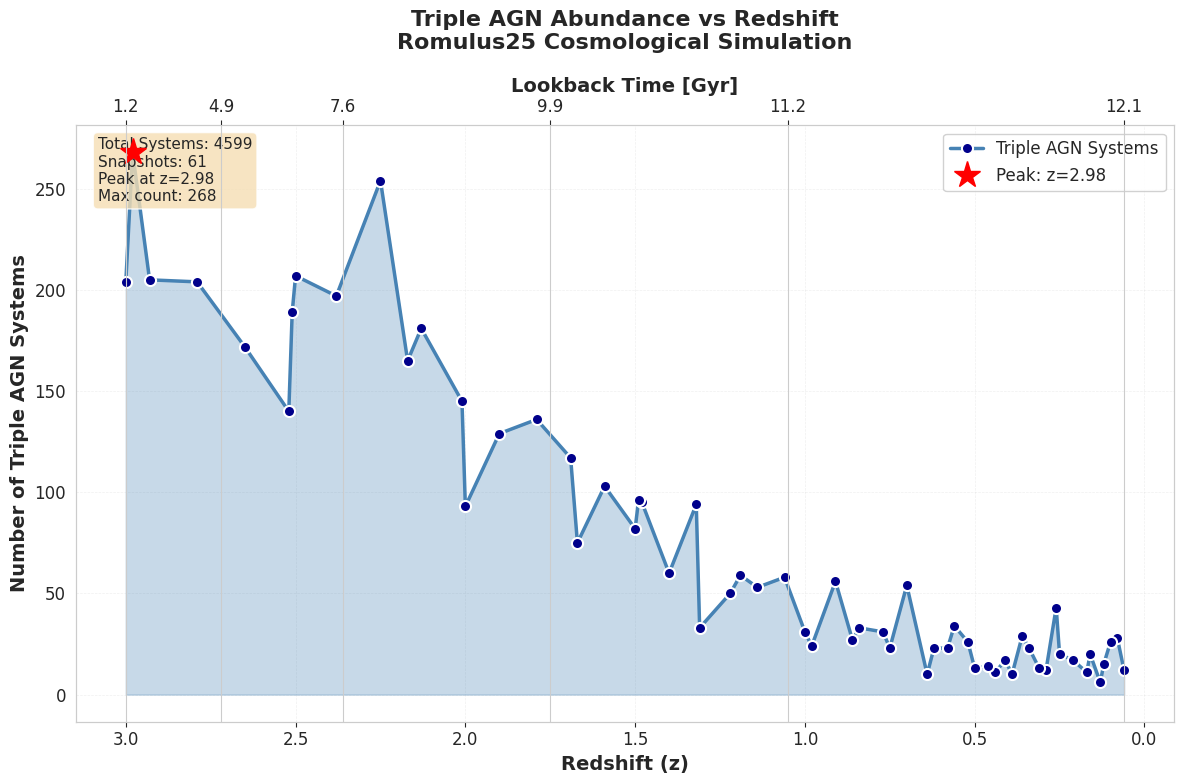


SUMMARY STATISTICS:
----------------------------------------------------------------------
Peak abundance: 268 systems at z=2.98
Minimum abundance: 6 systems at z=0.13
Mean: 75.4 systems per snapshot
Median: 43.0 systems per snapshot
Standard deviation: 71.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

# Set style
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Load all catalogs
catalog_path = "/scratch/stlock/tripleAGNs/datasets/catalogue_only/"
catalog_files = sorted(glob.glob(catalog_path + "TripleAGN-Catalog-R100-z*.csv"))

print("Loading catalogs...")
print("="*70)

# Extract redshift and count for each file
redshifts = []
counts = []

for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    num_systems = len(df)
    
    redshifts.append(z)
    counts.append(num_systems)
    print(f"z={z:.2f}: {num_systems:4d} triple AGN systems")

# Sort by redshift
sorted_indices = np.argsort(redshifts)
redshifts = np.array(redshifts)[sorted_indices]
counts = np.array(counts)[sorted_indices]

print("="*70)
print(f"Total triple AGN systems: {np.sum(counts)}")
print(f"Redshift range: z={redshifts.min():.2f} to z={redshifts.max():.2f}")
print("="*70)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot as connected line with markers
ax.plot(redshifts, counts, 'o-', linewidth=2.5, markersize=8, 
        color='steelblue', markerfacecolor='darkblue', markeredgecolor='white', 
        markeredgewidth=1.5, label='Triple AGN Systems')

# Add a filled area under the curve
ax.fill_between(redshifts, counts, alpha=0.3, color='steelblue')

# Styling
ax.set_xlabel('Redshift (z)', fontsize=14, fontweight='bold')
ax.set_ylabel('Number of Triple AGN Systems', fontsize=14, fontweight='bold')
ax.set_title('Triple AGN Abundance vs Redshift\nRomulus25 Cosmological Simulation', 
             fontsize=16, fontweight='bold', pad=20)

# Grid
ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.5)
ax.set_axisbelow(True)

# Set x-axis to go from high to low redshift (time forward)
ax.invert_xaxis()

# Add secondary x-axis with cosmic time
ax2 = ax.twiny()
ax2.set_xlabel('Lookback Time [Gyr]', fontsize=14, fontweight='bold')

# Approximate conversion (simplified)
# For ΛCDM with H0=70, Ωm=0.3, ΩΛ=0.7
def redshift_to_lookback_time(z):
    """Approximate lookback time in Gyr"""
    # Simple approximation: t = 13.8 - 13.8/(1+z)^1.5
    return 13.8 * (1 - 1/(1+z)**1.5)

lookback_times = redshift_to_lookback_time(redshifts)
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(redshifts[::max(1, len(redshifts)//5)])  # Show ~5 tick marks
ax2.set_xticklabels([f'{redshift_to_lookback_time(z):.1f}' for z in redshifts[::max(1, len(redshifts)//5)]])
ax2.invert_xaxis()

# Add statistics box
textstr = f'Total Systems: {np.sum(counts)}\n'
textstr += f'Snapshots: {len(counts)}\n'
textstr += f'Peak at z={redshifts[np.argmax(counts)]:.2f}\n'
textstr += f'Max count: {np.max(counts)}'

props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.02, 0.98, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', bbox=props)

# Highlight peak
peak_idx = np.argmax(counts)
ax.plot(redshifts[peak_idx], counts[peak_idx], 'r*', markersize=20, 
        label=f'Peak: z={redshifts[peak_idx]:.2f}', zorder=5)

ax.legend(loc='upper right', fontsize=12, framealpha=0.9)

plt.tight_layout()
## plt.savefig('triple_agn_vs_redshift.png', dpi=300, bbox_inches='tight')
print("\nPlot saved as 'triple_agn_vs_redshift.png'")
plt.show()

# Print summary statistics
print("\nSUMMARY STATISTICS:")
print("-"*70)
print(f"Peak abundance: {np.max(counts)} systems at z={redshifts[np.argmax(counts)]:.2f}")
print(f"Minimum abundance: {np.min(counts)} systems at z={redshifts[np.argmin(counts)]:.2f}")
print(f"Mean: {np.mean(counts):.1f} systems per snapshot")
print(f"Median: {np.median(counts):.1f} systems per snapshot")
print(f"Standard deviation: {np.std(counts):.1f}")

# Check for trends
if redshifts[-1] < redshifts[0]:  # Going forward in time (decreasing z)
    early_avg = np.mean(counts[:len(counts)//2])
    late_avg = np.mean(counts[len(counts)//2:])
    print(f"\nTrend: {'Increasing' if late_avg > early_avg else 'Decreasing'} with cosmic time")
    print(f"  High-z average (z>{redshifts[len(counts)//2]:.1f}): {early_avg:.1f} systems")
    print(f"  Low-z average (z<{redshifts[len(counts)//2]:.1f}): {late_avg:.1f} systems")

LOADING TRIPLE AGN CATALOGS
z=0.06:   12 triple AGN systems
z=0.08:   28 triple AGN systems
z=0.10:   26 triple AGN systems
z=0.12:   15 triple AGN systems
z=0.13:    6 triple AGN systems
z=0.16:   20 triple AGN systems
z=0.17:   11 triple AGN systems
z=0.21:   17 triple AGN systems
z=0.25:   20 triple AGN systems
z=0.26:   43 triple AGN systems
z=0.29:   12 triple AGN systems
z=0.31:   13 triple AGN systems
z=0.34:   23 triple AGN systems
z=0.36:   29 triple AGN systems
z=0.39:   10 triple AGN systems
z=0.41:   17 triple AGN systems
z=0.44:   11 triple AGN systems
z=0.46:   14 triple AGN systems
z=0.50:   13 triple AGN systems
z=0.52:   26 triple AGN systems
z=0.56:   34 triple AGN systems
z=0.58:   23 triple AGN systems
z=0.62:   23 triple AGN systems
z=0.64:   10 triple AGN systems
z=0.70:   54 triple AGN systems
z=0.75:   23 triple AGN systems
z=0.77:   31 triple AGN systems
z=0.84:   33 triple AGN systems
z=0.86:   27 triple AGN systems
z=0.91:   56 triple AGN systems
z=0.98:   24

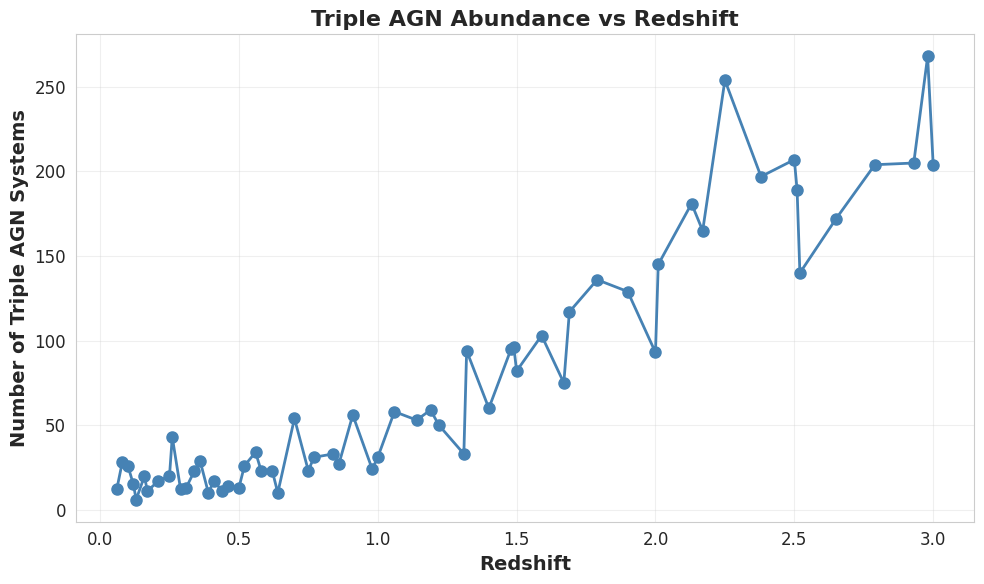


Creating Plot 2: AGN Separations...
Saved: plot2_agn_separations.png


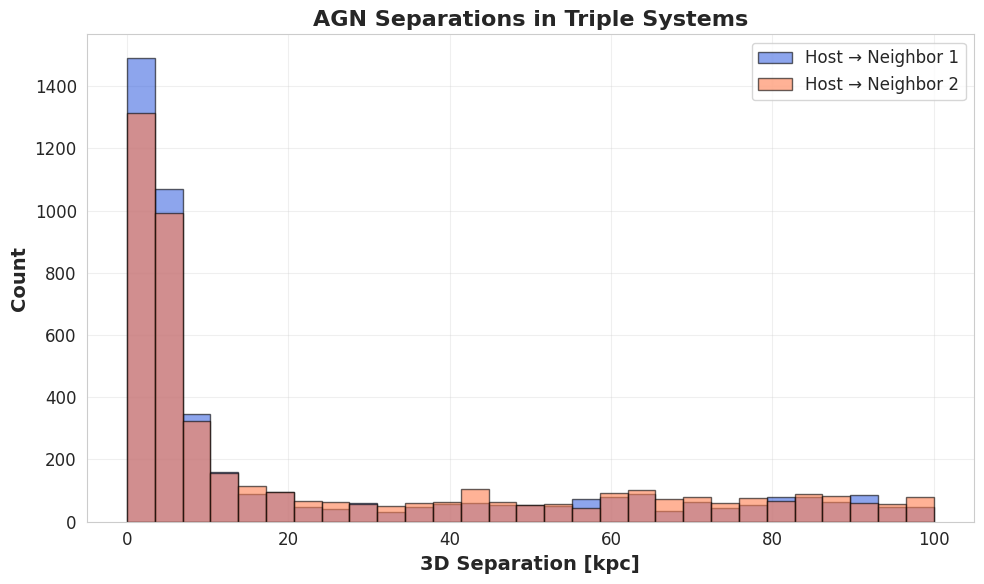


Creating Plot 3: AGN Luminosities...
Saved: plot3_agn_luminosities.png


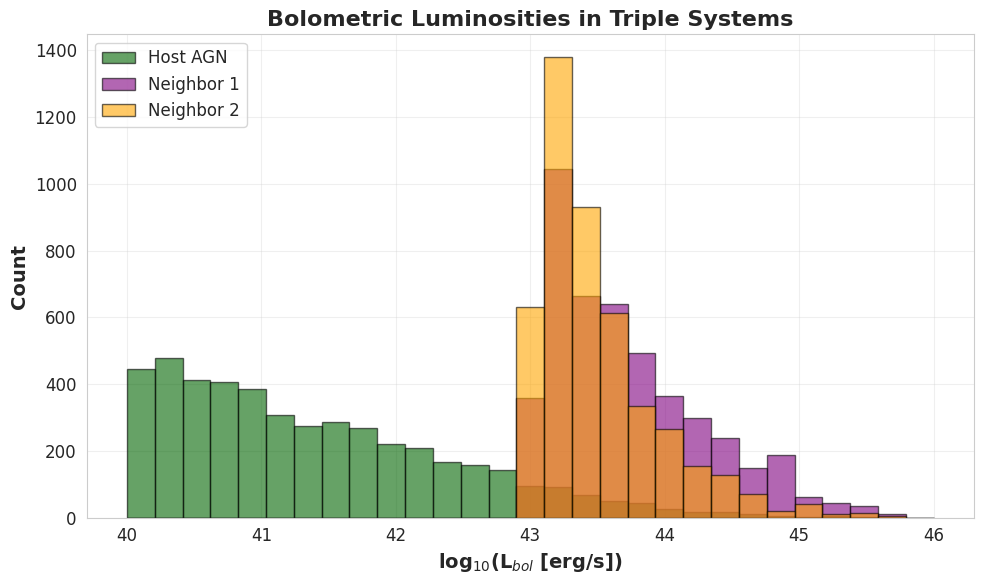


SUMMARY STATISTICS

1. Total triple AGN systems: 4599
2. Redshift range: z = 0.06 to 3.00
3. Number of snapshots: 61

All plots saved successfully!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# ===================================================================
# LOAD DATA
# ===================================================================
catalog_path = "/scratch/stlock/tripleAGNs/datasets/catalogue_only/"
catalog_files = sorted(glob.glob(catalog_path + "TripleAGN-Catalog-R100-z*.csv"))

print("="*70)
print("LOADING TRIPLE AGN CATALOGS")
print("="*70)

all_catalogs = []
for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    df['redshift'] = z
    all_catalogs.append(df)
    print(f"z={z:.2f}: {len(df):4d} triple AGN systems")

combined_df = pd.concat(all_catalogs, ignore_index=True)

print(f"\n{'='*70}")
print(f"TOTAL: {len(combined_df)} triple AGN systems")
print(f"{'='*70}\n")

# ===================================================================
# PLOT 1: Triple AGN Count vs Redshift
# ===================================================================
print("Creating Plot 1: Triple AGN Abundance vs Redshift...")

# Count systems per redshift
redshifts = []
counts = []
for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    redshifts.append(z)
    counts.append(len(df))

# Sort by redshift (ascending order for left to right)
sorted_indices = np.argsort(redshifts)
redshifts = np.array(redshifts)[sorted_indices]
counts = np.array(counts)[sorted_indices]

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(redshifts, counts, 'o-', linewidth=2, markersize=8, color='steelblue')

ax1.set_xlabel('Redshift', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Triple AGN Systems', fontsize=14, fontweight='bold')
ax1.set_title('Triple AGN Abundance vs Redshift', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot1_triple_agn_abundance.png', dpi=300, bbox_inches='tight')
print("Saved: plot1_triple_agn_abundance.png")
plt.show()

# ===================================================================
# PLOT 2: Separation Distributions
# ===================================================================
print("\nCreating Plot 2: AGN Separations...")

sep1 = combined_df['Separation_3D_kpc_1'].values
sep2 = combined_df['Separation_3D_kpc_2'].values

fig2, ax2 = plt.subplots(figsize=(10, 6))

bins = np.linspace(0, 100, 30)
ax2.hist(sep1, bins=bins, alpha=0.6, label='Host → Neighbor 1', 
         edgecolor='black', color='royalblue')
ax2.hist(sep2, bins=bins, alpha=0.6, label='Host → Neighbor 2', 
         edgecolor='black', color='coral')

ax2.set_xlabel('3D Separation [kpc]', fontsize=14, fontweight='bold')
ax2.set_ylabel('Count', fontsize=14, fontweight='bold')
ax2.set_title('AGN Separations in Triple Systems', fontsize=16, fontweight='bold')
ax2.legend(loc='upper right', fontsize=12)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot2_agn_separations.png', dpi=300, bbox_inches='tight')
print("Saved: plot2_agn_separations.png")
plt.show()

# ===================================================================
# PLOT 3: Luminosity Distributions
# ===================================================================
print("\nCreating Plot 3: AGN Luminosities...")

host_lbol = combined_df['BH_Lbol'].values
neighbor1_lbol = combined_df['Neighbour1BH_Lbol'].values
neighbor2_lbol = combined_df['Neighbour2BH_Lbol'].values

# Convert to log scale
log_host = np.log10(host_lbol)
log_n1 = np.log10(neighbor1_lbol)
log_n2 = np.log10(neighbor2_lbol)

fig3, ax3 = plt.subplots(figsize=(10, 6))

bins = np.linspace(40, 46, 30)
ax3.hist(log_host, bins=bins, alpha=0.6, label='Host AGN', 
         edgecolor='black', color='darkgreen')
ax3.hist(log_n1, bins=bins, alpha=0.6, label='Neighbor 1', 
         edgecolor='black', color='purple')
ax3.hist(log_n2, bins=bins, alpha=0.6, label='Neighbor 2', 
         edgecolor='black', color='orange')

ax3.set_xlabel('log$_{10}$(L$_{bol}$ [erg/s])', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count', fontsize=14, fontweight='bold')
ax3.set_title('Bolometric Luminosities in Triple Systems', fontsize=16, fontweight='bold')
ax3.legend(loc='upper left', fontsize=12)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot3_agn_luminosities.png', dpi=300, bbox_inches='tight')
print("Saved: plot3_agn_luminosities.png")
plt.show()

# ===================================================================
# SUMMARY STATISTICS
# ===================================================================
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print("\n1. Total triple AGN systems:", len(combined_df))
print("2. Redshift range: z = {:.2f} to {:.2f}".format(redshifts.min(), redshifts.max()))
print("3. Number of snapshots:", len(catalog_files))

print("\n" + "="*70)
print("All plots saved successfully!")
print("="*70)

LOADING TRIPLE AGN CATALOGS
z=0.06:   12 triple AGN systems
z=0.08:   28 triple AGN systems
z=0.10:   26 triple AGN systems
z=0.12:   15 triple AGN systems
z=0.13:    6 triple AGN systems
z=0.16:   20 triple AGN systems
z=0.17:   11 triple AGN systems
z=0.21:   17 triple AGN systems
z=0.25:   20 triple AGN systems
z=0.26:   43 triple AGN systems
z=0.29:   12 triple AGN systems
z=0.31:   13 triple AGN systems
z=0.34:   23 triple AGN systems
z=0.36:   29 triple AGN systems
z=0.39:   10 triple AGN systems
z=0.41:   17 triple AGN systems
z=0.44:   11 triple AGN systems
z=0.46:   14 triple AGN systems
z=0.50:   13 triple AGN systems
z=0.52:   26 triple AGN systems
z=0.56:   34 triple AGN systems
z=0.58:   23 triple AGN systems
z=0.62:   23 triple AGN systems
z=0.64:   10 triple AGN systems
z=0.70:   54 triple AGN systems
z=0.75:   23 triple AGN systems
z=0.77:   31 triple AGN systems
z=0.84:   33 triple AGN systems
z=0.86:   27 triple AGN systems
z=0.91:   56 triple AGN systems
z=0.98:   24

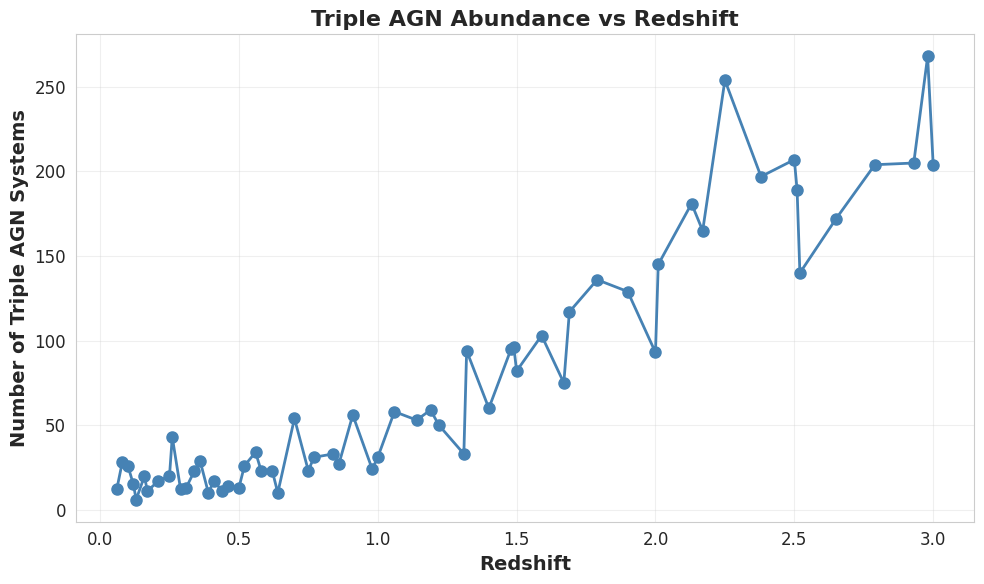


Creating Plot 2: AGN Separations...
Saved: plot2_agn_separations.png


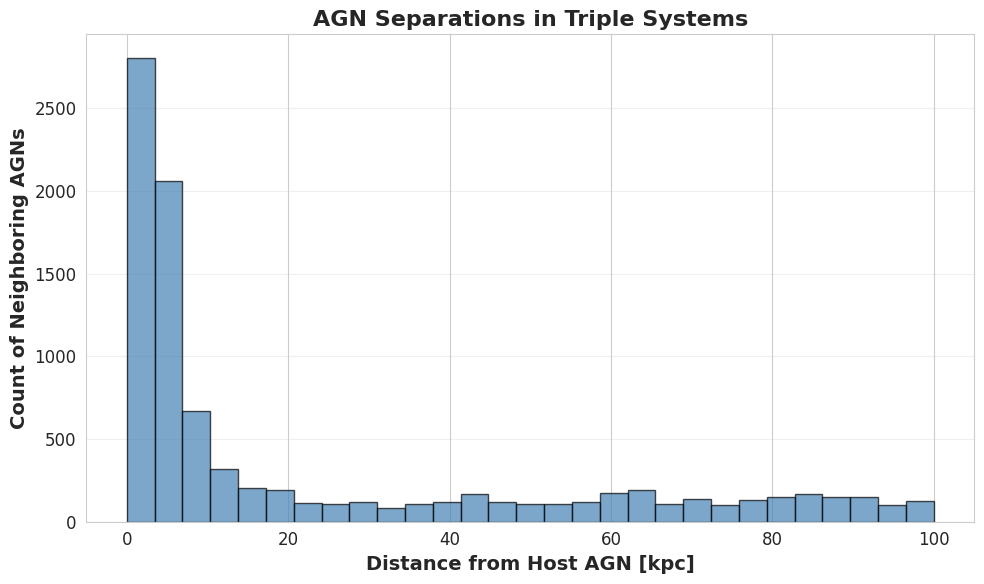


Creating Plot 3: AGN Luminosities...
Saved: plot3_agn_luminosities.png


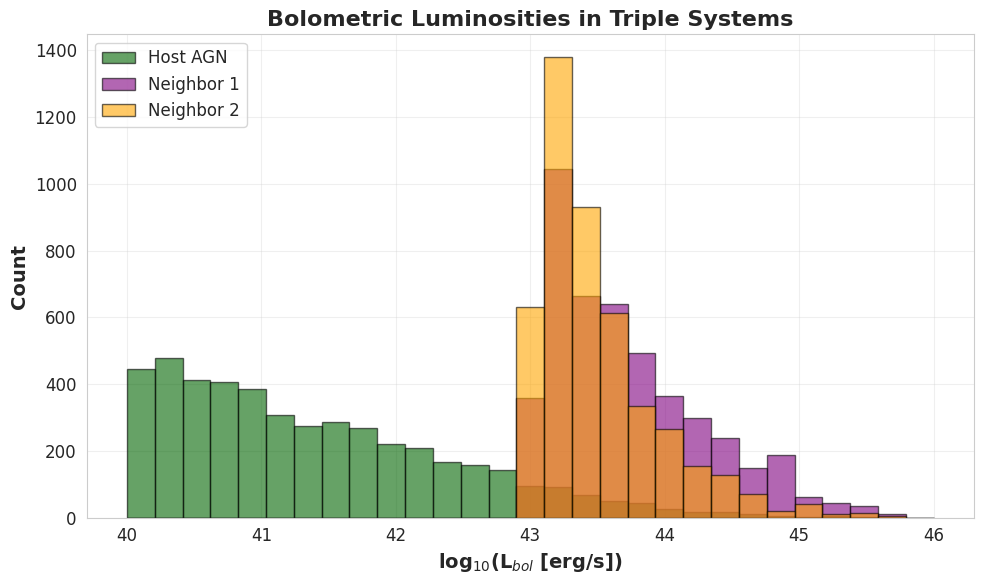


SUMMARY STATISTICS

1. Total triple AGN systems: 4599
2. Redshift range: z = 0.06 to 3.00
3. Number of snapshots: 61

All plots saved successfully!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# ===================================================================
# LOAD DATA
# ===================================================================
catalog_path = "/scratch/stlock/tripleAGNs/datasets/catalogue_only/"
catalog_files = sorted(glob.glob(catalog_path + "TripleAGN-Catalog-R100-z*.csv"))

print("="*70)
print("LOADING TRIPLE AGN CATALOGS")
print("="*70)

all_catalogs = []
for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    df['redshift'] = z
    all_catalogs.append(df)
    print(f"z={z:.2f}: {len(df):4d} triple AGN systems")

combined_df = pd.concat(all_catalogs, ignore_index=True)

print(f"\n{'='*70}")
print(f"TOTAL: {len(combined_df)} triple AGN systems")
print(f"{'='*70}\n")

# ===================================================================
# PLOT 1: Triple AGN Count vs Redshift
# ===================================================================
print("Creating Plot 1: Triple AGN Abundance vs Redshift...")

# Count systems per redshift
redshifts = []
counts = []
for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    redshifts.append(z)
    counts.append(len(df))

# Sort by redshift (ascending order for left to right)
sorted_indices = np.argsort(redshifts)
redshifts = np.array(redshifts)[sorted_indices]
counts = np.array(counts)[sorted_indices]

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(redshifts, counts, 'o-', linewidth=2, markersize=8, color='steelblue')

ax1.set_xlabel('Redshift', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Triple AGN Systems', fontsize=14, fontweight='bold')
ax1.set_title('Triple AGN Abundance vs Redshift', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot1_triple_agn_abundance.png', dpi=300, bbox_inches='tight')
print("Saved: plot1_triple_agn_abundance.png")
plt.show()

# ===================================================================
# PLOT 2: Separation Distributions (Bar Chart)
# ===================================================================
print("\nCreating Plot 2: AGN Separations...")

# Combine all separations from both neighbors
sep1 = combined_df['Separation_3D_kpc_1'].values
sep2 = combined_df['Separation_3D_kpc_2'].values
all_separations = np.concatenate([sep1, sep2])

fig2, ax2 = plt.subplots(figsize=(10, 6))

# Create histogram as bar chart
bins = np.linspace(0, 100, 30)
counts, bin_edges = np.histogram(all_separations, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

ax2.bar(bin_centers, counts, width=bin_width, edgecolor='black', 
        color='steelblue', alpha=0.7)

ax2.set_xlabel('Distance from Host AGN [kpc]', fontsize=14, fontweight='bold')
ax2.set_ylabel('Count of Neighboring AGNs', fontsize=14, fontweight='bold')
ax2.set_title('AGN Separations in Triple Systems', fontsize=16, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
# plt.savefig('plot2_agn_separations.png', dpi=300, bbox_inches='tight')
print("Saved: plot2_agn_separations.png")
plt.show()

# ===================================================================
# PLOT 3: Luminosity Distributions
# ===================================================================
print("\nCreating Plot 3: AGN Luminosities...")

host_lbol = combined_df['BH_Lbol'].values
neighbor1_lbol = combined_df['Neighbour1BH_Lbol'].values
neighbor2_lbol = combined_df['Neighbour2BH_Lbol'].values

# Convert to log scale
log_host = np.log10(host_lbol)
log_n1 = np.log10(neighbor1_lbol)
log_n2 = np.log10(neighbor2_lbol)

fig3, ax3 = plt.subplots(figsize=(10, 6))

bins = np.linspace(40, 46, 30)
ax3.hist(log_host, bins=bins, alpha=0.6, label='Host AGN', 
         edgecolor='black', color='darkgreen')
ax3.hist(log_n1, bins=bins, alpha=0.6, label='Neighbor 1', 
         edgecolor='black', color='purple')
ax3.hist(log_n2, bins=bins, alpha=0.6, label='Neighbor 2', 
         edgecolor='black', color='orange')

ax3.set_xlabel('log$_{10}$(L$_{bol}$ [erg/s])', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count', fontsize=14, fontweight='bold')
ax3.set_title('Bolometric Luminosities in Triple Systems', fontsize=16, fontweight='bold')
ax3.legend(loc='upper left', fontsize=12)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot3_agn_luminosities.png', dpi=300, bbox_inches='tight')
print("Saved: plot3_agn_luminosities.png")
plt.show()

# ===================================================================
# SUMMARY STATISTICS
# ===================================================================
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print("\n1. Total triple AGN systems:", len(combined_df))
print("2. Redshift range: z = {:.2f} to {:.2f}".format(redshifts.min(), redshifts.max()))
print("3. Number of snapshots:", len(catalog_files))

print("\n" + "="*70)
print("All plots saved successfully!")
print("="*70)

LOADING TRIPLE AGN CATALOGS
z=0.06:   12 triple AGN systems
z=0.08:   28 triple AGN systems
z=0.10:   26 triple AGN systems
z=0.12:   15 triple AGN systems
z=0.13:    6 triple AGN systems
z=0.16:   20 triple AGN systems
z=0.17:   11 triple AGN systems
z=0.21:   17 triple AGN systems
z=0.25:   20 triple AGN systems
z=0.26:   43 triple AGN systems
z=0.29:   12 triple AGN systems
z=0.31:   13 triple AGN systems
z=0.34:   23 triple AGN systems
z=0.36:   29 triple AGN systems
z=0.39:   10 triple AGN systems
z=0.41:   17 triple AGN systems
z=0.44:   11 triple AGN systems
z=0.46:   14 triple AGN systems
z=0.50:   13 triple AGN systems
z=0.52:   26 triple AGN systems
z=0.56:   34 triple AGN systems
z=0.58:   23 triple AGN systems
z=0.62:   23 triple AGN systems
z=0.64:   10 triple AGN systems
z=0.70:   54 triple AGN systems
z=0.75:   23 triple AGN systems
z=0.77:   31 triple AGN systems
z=0.84:   33 triple AGN systems
z=0.86:   27 triple AGN systems
z=0.91:   56 triple AGN systems
z=0.98:   24

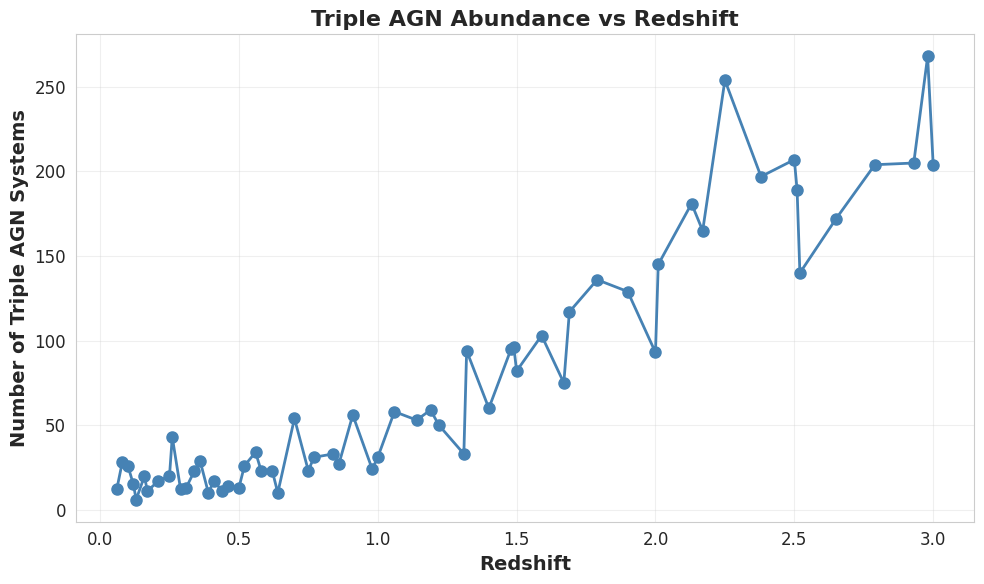


Creating Plot 2: AGN Separations...
Saved: plot2_agn_separations.png


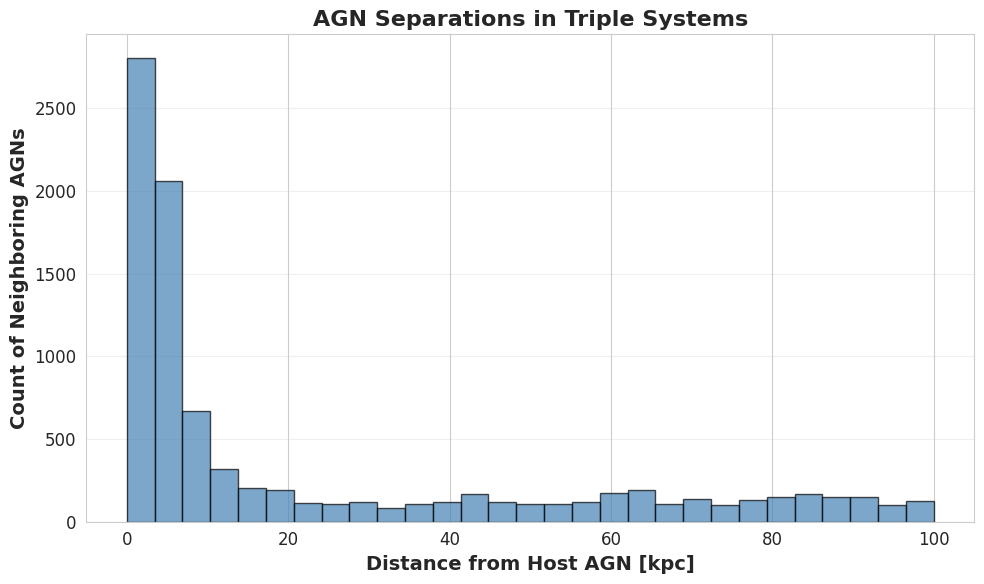


Creating Plot 3: AGN Luminosities...
Saved: plot3_agn_luminosities.png


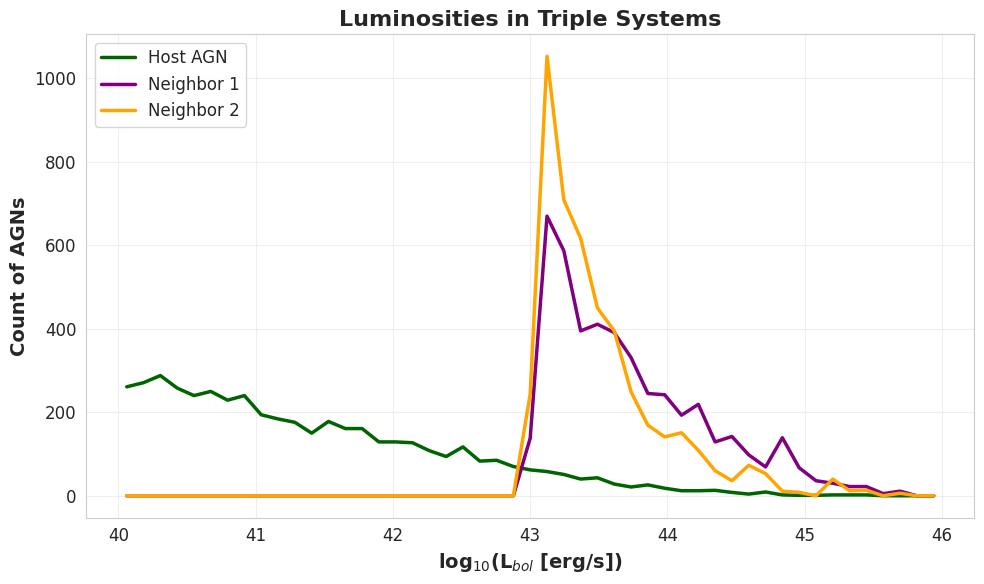


Creating Plot 4: BH Masses...
Saved: plot4_bh_masses.png


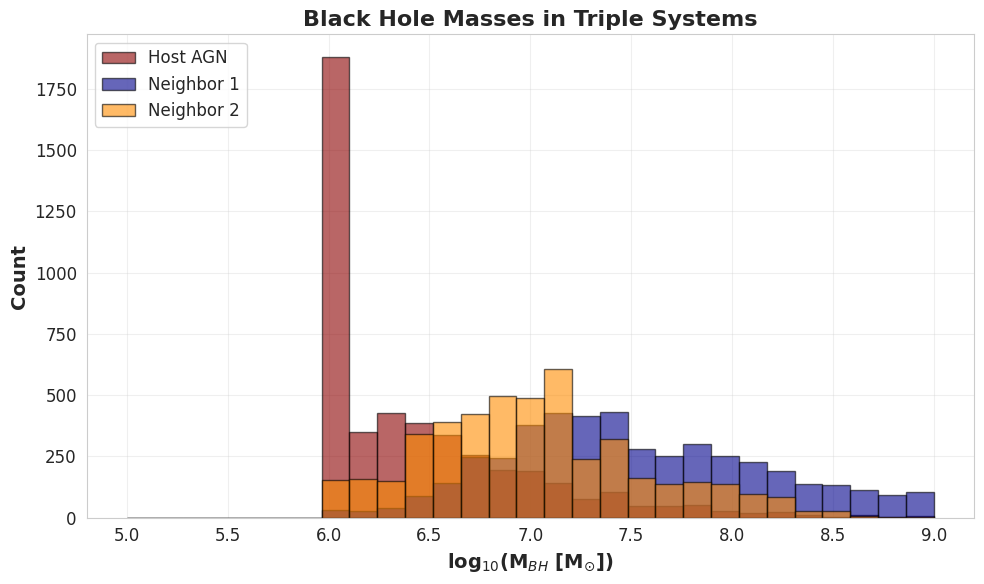


SUMMARY STATISTICS

1. Total triple AGN systems: 4599
2. Redshift range: z = 0.06 to 3.00
3. Number of snapshots: 61

All 4 plots saved successfully!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# ===================================================================
# LOAD DATA
# ===================================================================
catalog_path = "/scratch/stlock/tripleAGNs/datasets/catalogue_only/"
catalog_files = sorted(glob.glob(catalog_path + "TripleAGN-Catalog-R100-z*.csv"))

print("="*70)
print("LOADING TRIPLE AGN CATALOGS")
print("="*70)

all_catalogs = []
for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    df['redshift'] = z
    all_catalogs.append(df)
    print(f"z={z:.2f}: {len(df):4d} triple AGN systems")

combined_df = pd.concat(all_catalogs, ignore_index=True)

print(f"\n{'='*70}")
print(f"TOTAL: {len(combined_df)} triple AGN systems")
print(f"{'='*70}\n")

# ===================================================================
# PLOT 1: Triple AGN Count vs Redshift
# ===================================================================
print("Creating Plot 1: Triple AGN Abundance vs Redshift...")

# Count systems per redshift
redshifts = []
counts = []
for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    redshifts.append(z)
    counts.append(len(df))

# Sort by redshift (ascending order for left to right)
sorted_indices = np.argsort(redshifts)
redshifts = np.array(redshifts)[sorted_indices]
counts = np.array(counts)[sorted_indices]

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(redshifts, counts, 'o-', linewidth=2, markersize=8, color='steelblue')

ax1.set_xlabel('Redshift', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Triple AGN Systems', fontsize=14, fontweight='bold')
ax1.set_title('Triple AGN Abundance vs Redshift', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot1_triple_agn_abundance.png', dpi=300, bbox_inches='tight')
print("Saved: plot1_triple_agn_abundance.png")
plt.show()

# ===================================================================
# PLOT 2: Separation Distributions (Bar Chart)
# ===================================================================
print("\nCreating Plot 2: AGN Separations...")

# Combine all separations from both neighbors
sep1 = combined_df['Separation_3D_kpc_1'].values
sep2 = combined_df['Separation_3D_kpc_2'].values
all_separations = np.concatenate([sep1, sep2])

fig2, ax2 = plt.subplots(figsize=(10, 6))

# Create histogram as bar chart
bins = np.linspace(0, 100, 30)
counts, bin_edges = np.histogram(all_separations, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

ax2.bar(bin_centers, counts, width=bin_width, edgecolor='black', 
        color='steelblue', alpha=0.7)

ax2.set_xlabel('Distance from Host AGN [kpc]', fontsize=14, fontweight='bold')
ax2.set_ylabel('Count of Neighboring AGNs', fontsize=14, fontweight='bold')
ax2.set_title('AGN Separations in Triple Systems', fontsize=16, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
# plt.savefig('plot2_agn_separations.png', dpi=300, bbox_inches='tight')
print("Saved: plot2_agn_separations.png")
plt.show()

# ===================================================================
# PLOT 3: Luminosity Distributions (Line Plot)
# ===================================================================
print("\nCreating Plot 3: AGN Luminosities...")

host_lbol = combined_df['BH_Lbol'].values
neighbor1_lbol = combined_df['Neighbour1BH_Lbol'].values
neighbor2_lbol = combined_df['Neighbour2BH_Lbol'].values

# Convert to log scale
log_host = np.log10(host_lbol)
log_n1 = np.log10(neighbor1_lbol)
log_n2 = np.log10(neighbor2_lbol)

fig3, ax3 = plt.subplots(figsize=(10, 6))

# Create histograms to get counts
bins = np.linspace(40, 46, 50)
host_counts, host_bin_edges = np.histogram(log_host, bins=bins)
n1_counts, n1_bin_edges = np.histogram(log_n1, bins=bins)
n2_counts, n2_bin_edges = np.histogram(log_n2, bins=bins)

# Get bin centers for x-axis
host_bin_centers = (host_bin_edges[:-1] + host_bin_edges[1:]) / 2
n1_bin_centers = (n1_bin_edges[:-1] + n1_bin_edges[1:]) / 2
n2_bin_centers = (n2_bin_edges[:-1] + n2_bin_edges[1:]) / 2

# Plot as lines
ax3.plot(host_bin_centers, host_counts, linewidth=2.5, label='Host AGN', color='darkgreen')
ax3.plot(n1_bin_centers, n1_counts, linewidth=2.5, label='Neighbor 1', color='purple')
ax3.plot(n2_bin_centers, n2_counts, linewidth=2.5, label='Neighbor 2', color='orange')

ax3.set_xlabel('log$_{10}$(L$_{bol}$ [erg/s])', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count of AGNs', fontsize=14, fontweight='bold')
ax3.set_title('Luminosities in Triple Systems', fontsize=16, fontweight='bold')
ax3.legend(loc='upper left', fontsize=12)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot3_agn_luminosities.png', dpi=300, bbox_inches='tight')
print("Saved: plot3_agn_luminosities.png")
plt.show()

# ===================================================================
# PLOT 4: Mass Distributions
# ===================================================================
print("\nCreating Plot 4: BH Masses...")

host_mass = combined_df['BH_mass'].values
neighbor1_mass = combined_df['Neighbour1BH_mass'].values
neighbor2_mass = combined_df['Neighbour2BH_mass'].values

# Convert to log scale
log_host_mass = np.log10(host_mass)
log_n1_mass = np.log10(neighbor1_mass)
log_n2_mass = np.log10(neighbor2_mass)

fig4, ax4 = plt.subplots(figsize=(10, 6))

bins = np.linspace(5, 9, 30)
ax4.hist(log_host_mass, bins=bins, alpha=0.6, label='Host AGN', 
         edgecolor='black', color='darkred')
ax4.hist(log_n1_mass, bins=bins, alpha=0.6, label='Neighbor 1', 
         edgecolor='black', color='darkblue')
ax4.hist(log_n2_mass, bins=bins, alpha=0.6, label='Neighbor 2', 
         edgecolor='black', color='darkorange')

ax4.set_xlabel('log$_{10}$(M$_{BH}$ [M$_{\odot}$])', fontsize=14, fontweight='bold')
ax4.set_ylabel('Count', fontsize=14, fontweight='bold')
ax4.set_title('Black Hole Masses in Triple Systems', fontsize=16, fontweight='bold')
ax4.legend(loc='upper left', fontsize=12)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot4_bh_masses.png', dpi=300, bbox_inches='tight')
print("Saved: plot4_bh_masses.png")
plt.show()

# ===================================================================
# SUMMARY STATISTICS
# ===================================================================
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print("\n1. Total triple AGN systems:", len(combined_df))
print("2. Redshift range: z = {:.2f} to {:.2f}".format(redshifts.min(), redshifts.max()))
print("3. Number of snapshots:", len(catalog_files))

print("\n" + "="*70)
print("All 4 plots saved successfully!")
print("="*70)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

# Set style
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12

# ===================================================================
# LOAD DATA
# ===================================================================
catalog_path = "/scratch/stlock/tripleAGNs/datasets/catalogue_100kpc_40lum/"
catalog_files = sorted(glob.glob(catalog_path + "TripleAGN-Catalog-R100-z*.csv"))

print("="*70)
print("LOADING TRIPLE AGN CATALOGS")
print("="*70)

all_catalogs = []
for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    df['redshift'] = z
    all_catalogs.append(df)
    print(f"z={z:.2f}: {len(df):4d} triple AGN systems")

combined_df = pd.concat(all_catalogs, ignore_index=True)

print(f"\n{'='*70}")
print(f"TOTAL: {len(combined_df)} triple AGN systems")
print(f"{'='*70}\n")

# ===================================================================
# PLOT 1: Triple AGN Count vs Redshift
# ===================================================================
print("Creating Plot 1: Triple AGN Abundance vs Redshift...")

# Count systems per redshift
redshifts = []
counts = []
for file in catalog_files:
    z = float(file.split('z')[-1].replace('.csv', ''))
    df = pd.read_csv(file)
    redshifts.append(z)
    counts.append(len(df))

# Sort by redshift (ascending order for left to right)
sorted_indices = np.argsort(redshifts)
redshifts = np.array(redshifts)[sorted_indices]
counts = np.array(counts)[sorted_indices]

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(redshifts, counts, 'o-', linewidth=2, markersize=8, color='steelblue')

ax1.set_xlabel('Redshift', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Triple AGN Systems', fontsize=14, fontweight='bold')
ax1.set_title('Triple AGN Abundance vs Redshift', fontsize=16, fontweight='bold')
ax1.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot1_triple_agn_abundance.png', dpi=300, bbox_inches='tight')
print("Saved: plot1_triple_agn_abundance.png")
plt.show()

# ===================================================================
# PLOT 2: Separation Distributions (Bar Chart)
# ===================================================================
print("\nCreating Plot 2: AGN Separations...")

# Combine all separations from both neighbors
sep1 = combined_df['Separation_3D_kpc_1'].values
sep2 = combined_df['Separation_3D_kpc_2'].values
all_separations = np.concatenate([sep1, sep2])

fig2, ax2 = plt.subplots(figsize=(10, 6))

# Create histogram as bar chart
bins = np.linspace(0, 100, 30)
counts, bin_edges = np.histogram(all_separations, bins=bins)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
bin_width = bin_edges[1] - bin_edges[0]

ax2.bar(bin_centers, counts, width=bin_width, edgecolor='black', 
        color='steelblue', alpha=0.7)

ax2.set_xlabel('Distance from Host AGN [kpc]', fontsize=14, fontweight='bold')
ax2.set_ylabel('Count of Neighboring AGNs', fontsize=14, fontweight='bold')
ax2.set_title('AGN Separations in Triple Systems', fontsize=16, fontweight='bold')
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
# plt.savefig('plot2_agn_separations.png', dpi=300, bbox_inches='tight')
print("Saved: plot2_agn_separations.png")
plt.show()

# ===================================================================
# PLOT 3: Luminosity Distributions (Line Plot)
# ===================================================================
print("\nCreating Plot 3: AGN Luminosities...")

host_lbol = combined_df['BH_Lbol'].values
neighbor1_lbol = combined_df['Neighbour1BH_Lbol'].values
neighbor2_lbol = combined_df['Neighbour2BH_Lbol'].values

# Convert to log scale
log_host = np.log10(host_lbol)
log_n1 = np.log10(neighbor1_lbol)
log_n2 = np.log10(neighbor2_lbol)

fig3, ax3 = plt.subplots(figsize=(10, 6))

# Create histograms to get counts
bins = np.linspace(40, 46, 50)
host_counts, host_bin_edges = np.histogram(log_host, bins=bins)
n1_counts, n1_bin_edges = np.histogram(log_n1, bins=bins)
n2_counts, n2_bin_edges = np.histogram(log_n2, bins=bins)

# Get bin centers for x-axis
host_bin_centers = (host_bin_edges[:-1] + host_bin_edges[1:]) / 2
n1_bin_centers = (n1_bin_edges[:-1] + n1_bin_edges[1:]) / 2
n2_bin_centers = (n2_bin_edges[:-1] + n2_bin_edges[1:]) / 2

# Plot as lines
ax3.plot(host_bin_centers, host_counts, linewidth=2.5, label='Host AGN', color='darkgreen')
ax3.plot(n1_bin_centers, n1_counts, linewidth=2.5, label='Neighbor 1', color='purple')
ax3.plot(n2_bin_centers, n2_counts, linewidth=2.5, label='Neighbor 2', color='orange')

ax3.set_xlabel('log$_{10}$(L$_{bol}$ [erg/s])', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count of AGNs', fontsize=14, fontweight='bold')
ax3.set_title('Luminosities in Triple Systems', fontsize=16, fontweight='bold')
ax3.legend(loc='upper left', fontsize=12)
ax3.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot3_agn_luminosities.png', dpi=300, bbox_inches='tight')
print("Saved: plot3_agn_luminosities.png")
plt.show()

# ===================================================================
# PLOT 4: Mass Distributions
# ===================================================================
print("\nCreating Plot 4: BH Masses...")

host_mass = combined_df['BH_mass'].values
neighbor1_mass = combined_df['Neighbour1BH_mass'].values
neighbor2_mass = combined_df['Neighbour2BH_mass'].values

# Convert to log scale
log_host_mass = np.log10(host_mass)
log_n1_mass = np.log10(neighbor1_mass)
log_n2_mass = np.log10(neighbor2_mass)

fig4, ax4 = plt.subplots(figsize=(10, 6))

bins = np.linspace(5, 9, 30)
ax4.hist(log_host_mass, bins=bins, alpha=0.6, label='Host AGN', 
         edgecolor='black', color='darkred')
ax4.hist(log_n1_mass, bins=bins, alpha=0.6, label='Neighbor 1', 
         edgecolor='black', color='darkblue')
ax4.hist(log_n2_mass, bins=bins, alpha=0.6, label='Neighbor 2', 
         edgecolor='black', color='darkorange')

ax4.set_xlabel('log$_{10}$(M$_{BH}$ [M$_{\odot}$])', fontsize=14, fontweight='bold')
ax4.set_ylabel('Count', fontsize=14, fontweight='bold')
ax4.set_title('Black Hole Masses in Triple Systems', fontsize=16, fontweight='bold')
ax4.legend(loc='upper left', fontsize=12)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
# plt.savefig('plot4_bh_masses.png', dpi=300, bbox_inches='tight')
print("Saved: plot4_bh_masses.png")
plt.show()

# ===================================================================
# SUMMARY STATISTICS
# ===================================================================
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)

print("\n1. Total triple AGN systems:", len(combined_df))
print("2. Redshift range: z = {:.2f} to {:.2f}".format(redshifts.min(), redshifts.max()))
print("3. Number of snapshots:", len(catalog_files))

print("\n" + "="*70)
print("All 4 plots saved successfully!")
print("="*70)